# A quick introduction to cyclical behavior and autocorrelation

This notebook shows some very simple examples with sets of sine and cosine curves.  It is meant to complement the portion of the first spectral analysis lecture dealing with concepts related to oscillations and cycles, autocorrelation, and simple estimates of spectral power.

Let's first load some libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# nicely render figures in the notebook 
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


Here we'll initialize a time dimension of 128 steps that we'll use throughout the notebook.  The function that follows simply creates and plots a sine and cosine wave with a given number of cycles over our time period of 128 steps.

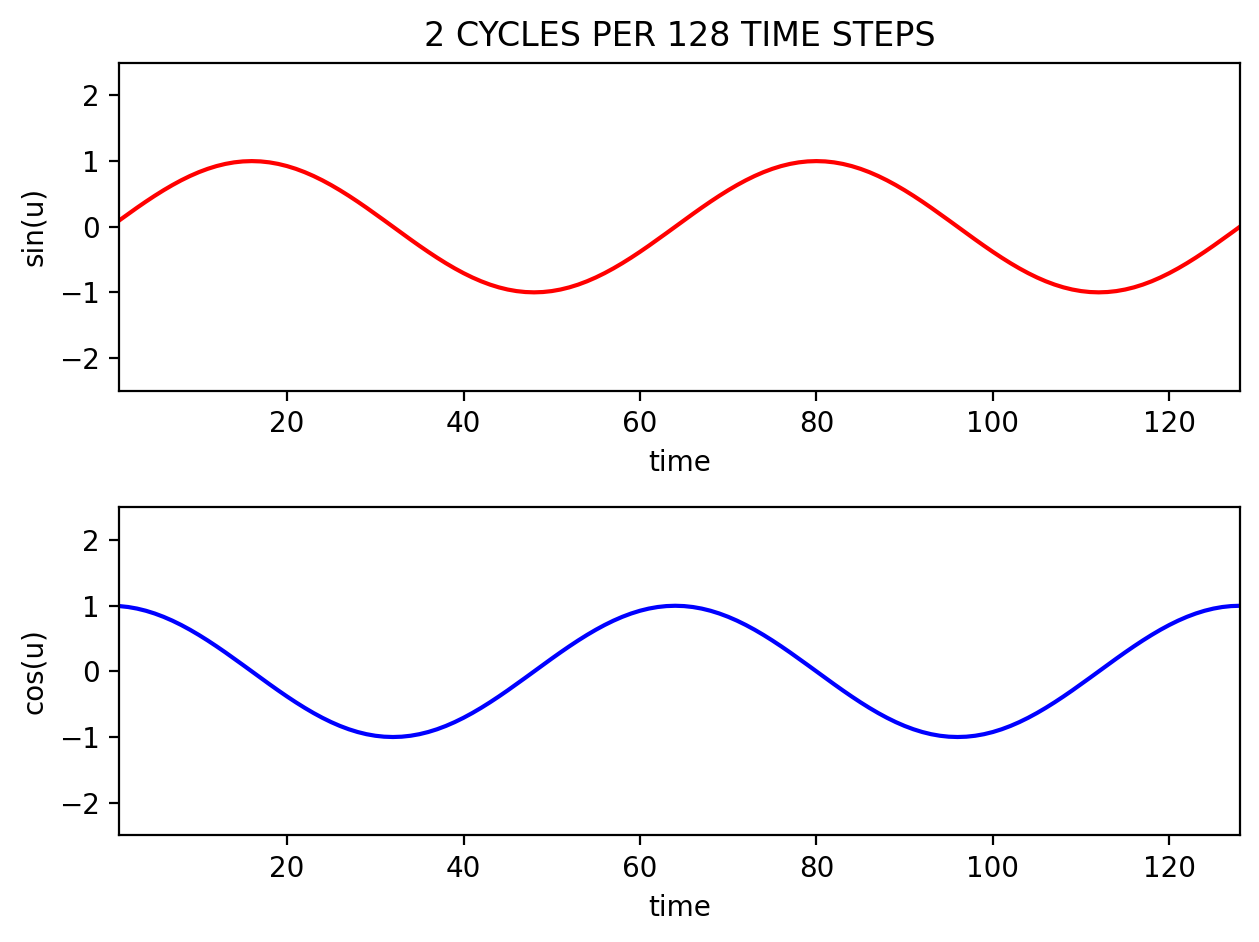

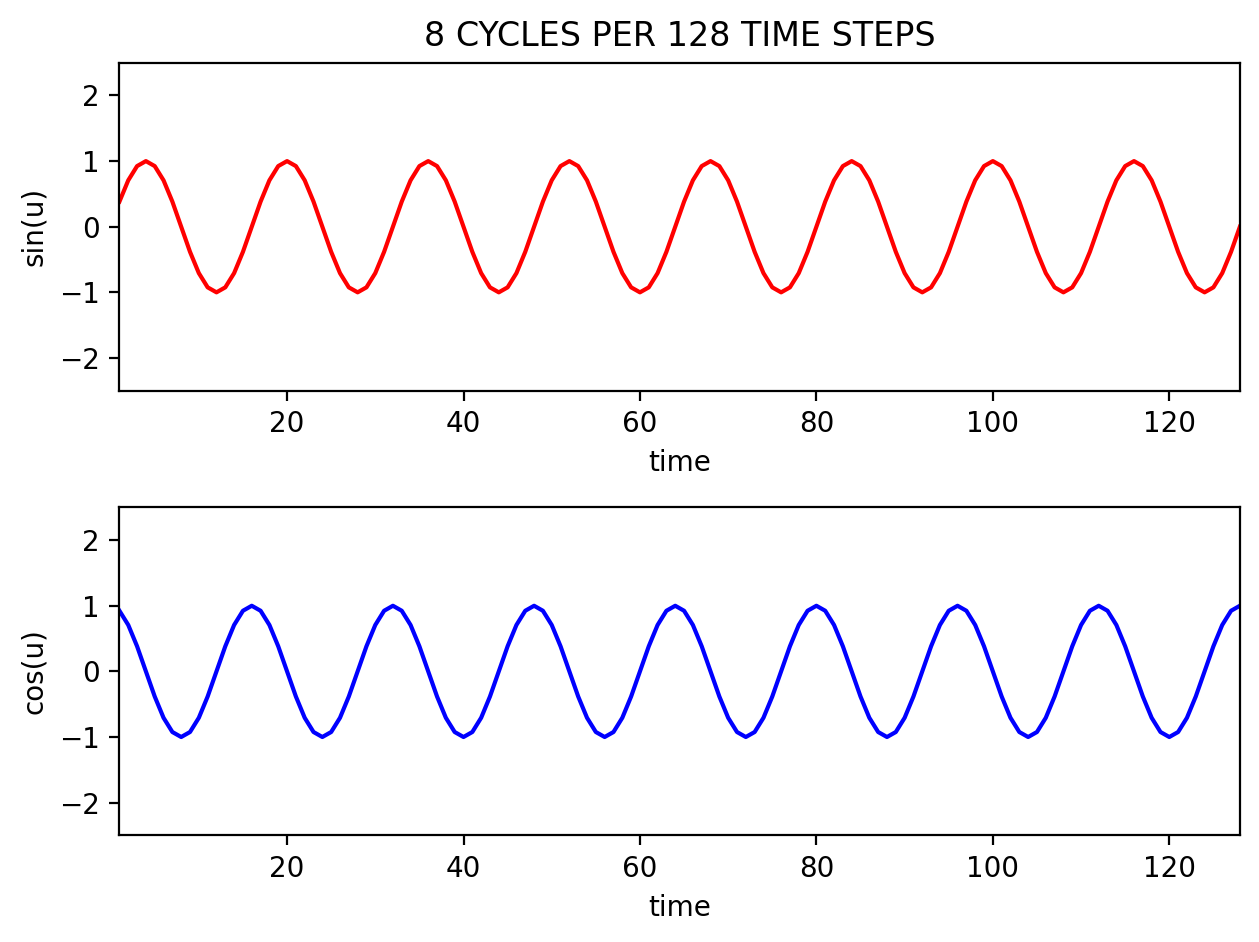

In [2]:
# Initialize a simple 'time' dimension from 1 to 128 time steps
t = np.arange(1, 129)

# let's define a simple function that will calculate and plot sine and cosine waves described by how often those cycles occur (frequency)
def plot_cycle(cyclesPerTime):
    u = 2 * np.pi * (cyclesPerTime / 128) * t
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(t, np.sin(u), 'r')
    plt.ylim([-2.5, 2.5])
    plt.xlim([1, 128])
    plt.xlabel('time')
    plt.ylabel('sin(u)')
    plt.title(f'{cyclesPerTime} CYCLES PER 128 TIME STEPS')

    plt.subplot(2, 1, 2)
    plt.plot(t, np.cos(u), 'b')
    plt.ylim([-2.5, 2.5])
    plt.xlim([1, 128])
    plt.xlabel('time')
    plt.ylabel('cos(u)')
    plt.tight_layout()
    plt.show()

# Use the function above to explore different cycle frequencies - change to see the effect of changing the 'cycles per time' parameter
plot_cycle(2)
plot_cycle(8)


The amplitude of a sine or cosine wave is controlled relatively simply by multiplying the cyclical term by a scalar:

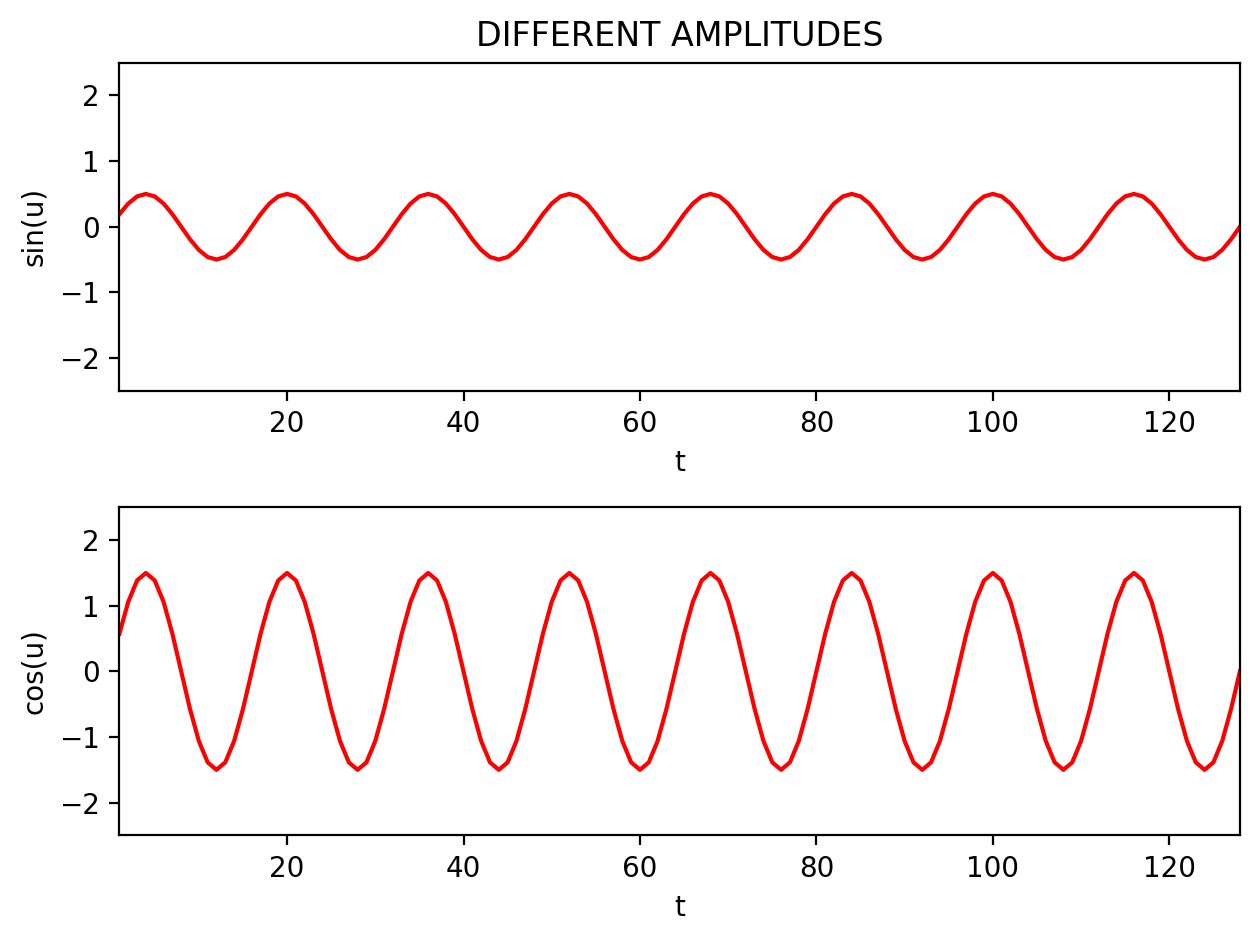

In [3]:
# See the effect of amplitude

# a damped amplitude
A = 0.5
u = 2 * np.pi * (8 / 128) * t
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, A*np.sin(u), 'r')
plt.ylim([-2.5, 2.5])
plt.xlim([1, 128])
plt.xlabel('t')
plt.ylabel('sin(u)')
plt.title('DIFFERENT AMPLITUDES')

# a larger amplitude
A = 1.5
plt.subplot(2, 1, 2)
plt.plot(t, A*np.sin(u), 'r')
plt.ylim([-2.5, 2.5])
plt.xlim([1, 128])
plt.xlabel('t')
plt.ylabel('cos(u)')
plt.tight_layout()
plt.show()


As we start to conceptualize spectral analysis as identifying superimposed cycles of different amplitude, frequency, and phase, we can begin first by looking at a few simple additive examples.  Because the code below has a random aspect, you can re-run the code block to watch different features and interaction arise:

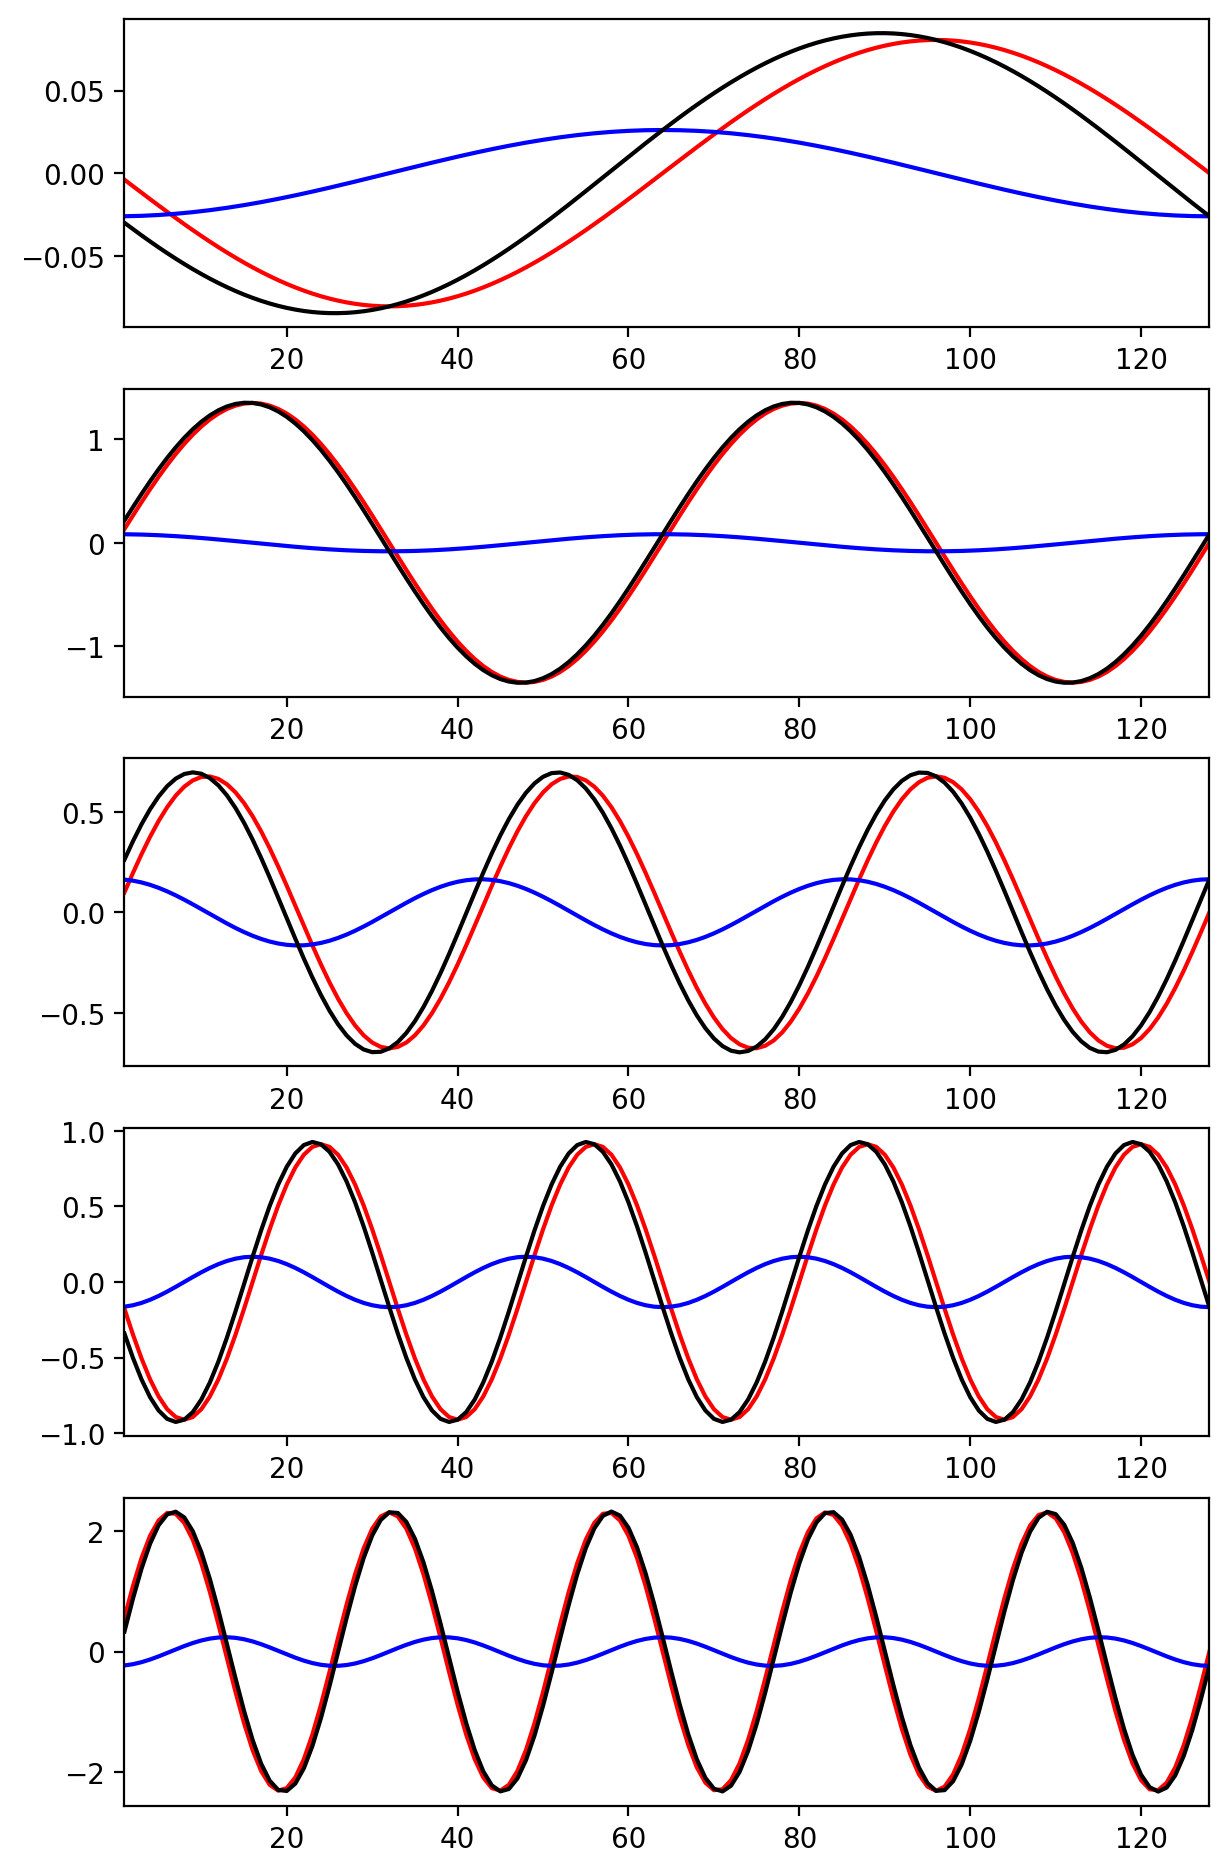

In [4]:
# Superposition and constructuve/destructive additive effect of sine and cosine waves

# since there is a random component to the phase of each curve, can run code block multiple times to see different effects
plt.figure(figsize=(7,14))
for i in range(1, 6):
    u_i = 2 * np.pi * (i / 128) * t
    st = np.random.randn() * np.sin(u_i)
    ct = np.random.randn() * np.cos(u_i)
    plt.subplot(6, 1, i)
    plt.plot(t, st, 'r')
    plt.plot(t, ct, 'b')
    plt.xlim([1, 128])
    combined = st + ct
    plt.plot(t, combined, 'k')



We'll use the `periodogram` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.periodogram.html) as a way to identify the frequency (or wavelength, the inverse of the frequency) of a signal with periodic elements.  For instance, let's calculate the spectrum of the last combined signal from above.  We'll plot it both as a function of the returned frequencies ($f$) and the wavelenth ($1/f$):

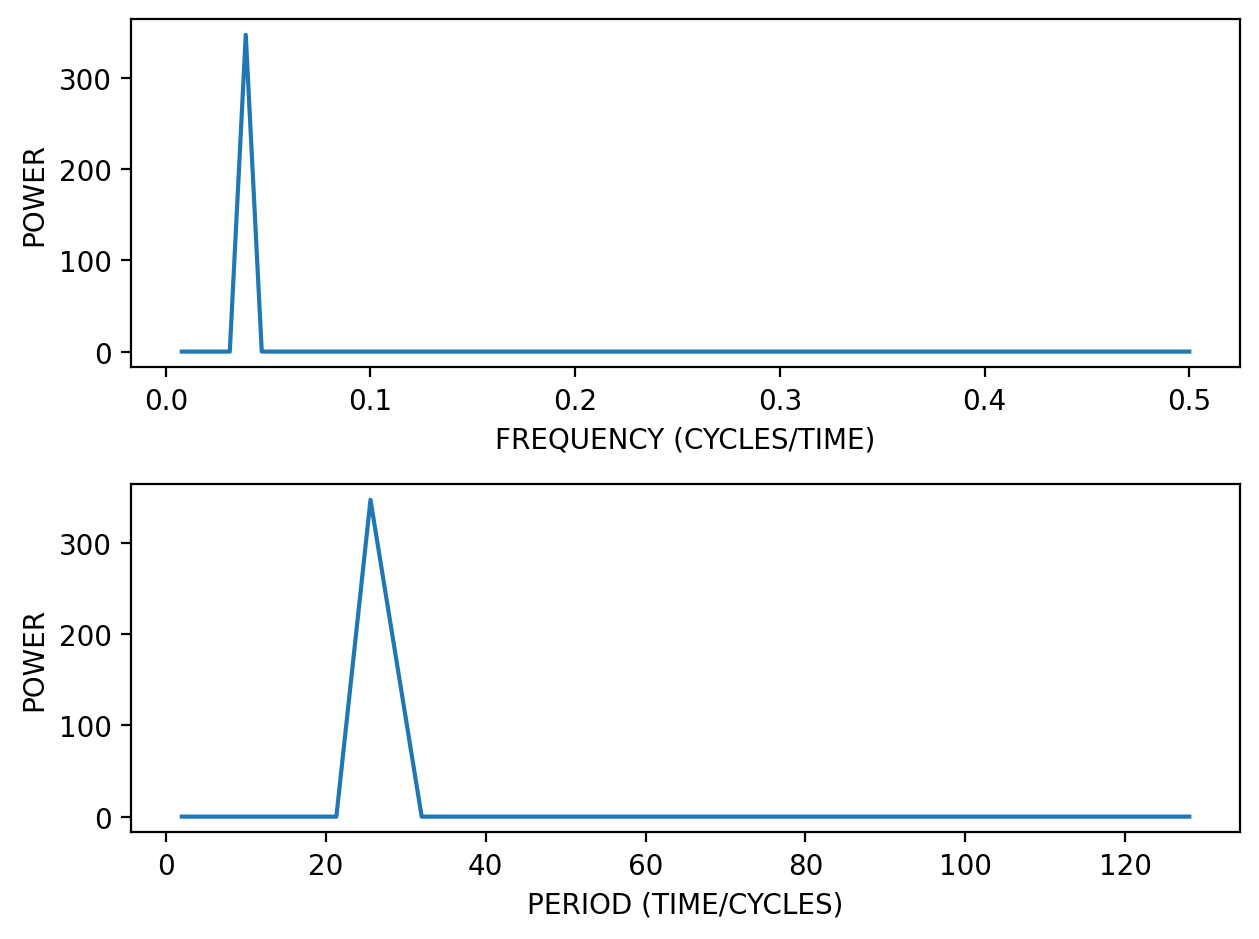

In [5]:
from scipy.signal import periodogram # Scipy has a simple periodogram function

# Simple periodogram on the last combined sine+cosine wave above 
f, Pxx = periodogram(combined) # we'll expect a signal a bit longer than 20 time untis (6 cycles per 128 time units ~20ish year wavelength)
f = np.delete(f, 0) # remove the zero-th power
Pxx = np.delete(Pxx, 0) # remove the zero-th power

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(f, Pxx)
plt.xlabel('FREQUENCY (CYCLES/TIME)')
plt.ylabel('POWER')

plt.subplot(2, 1, 2)
plt.plot(1./f, Pxx)
plt.xlabel('PERIOD (TIME/CYCLES)')
plt.ylabel('POWER')
plt.tight_layout()
plt.show()



If we were to add many sine and cosine waves together, we could get a single time series that contained a range of periodic behavior.  Let's see what that might look like with 20 sine waves added together:

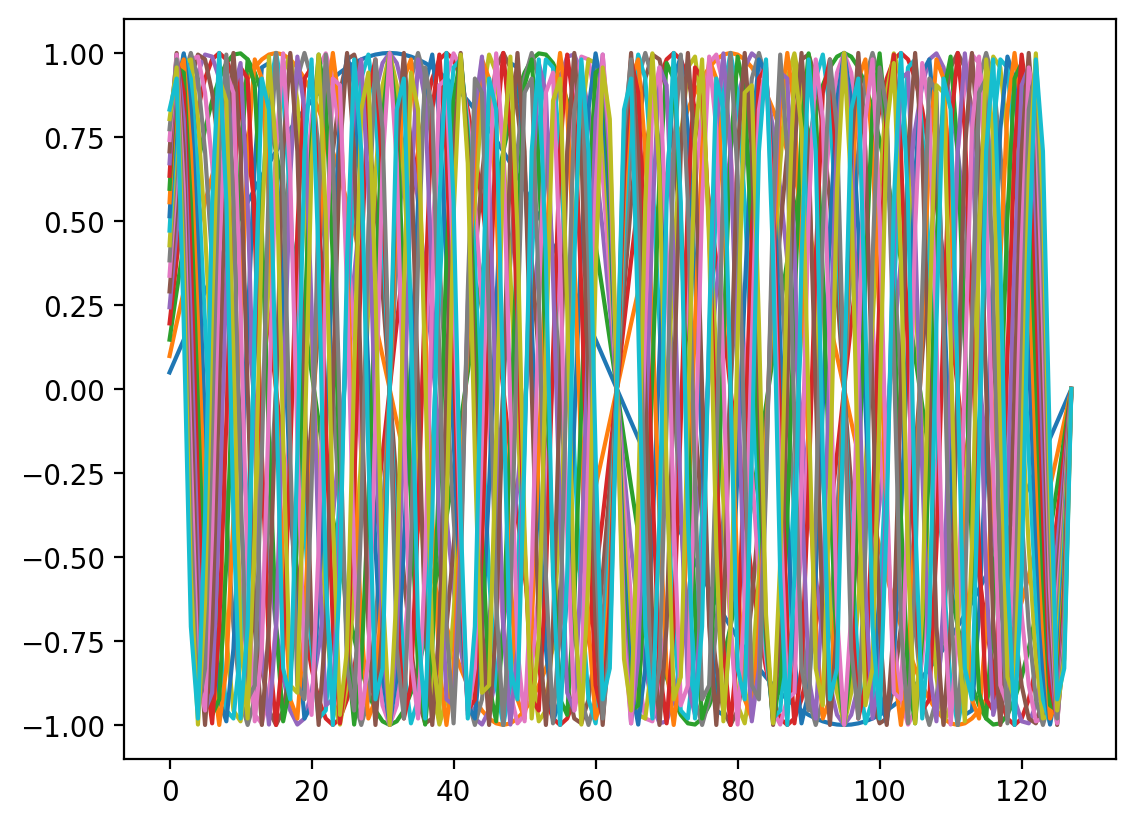

In [6]:
# additive power across frequency bands
st_array = np.full([20,128],np.nan)
ct_array = np.full([20,128],np.nan)
for i in range(1, 21): 
    u_i = 2 * np.pi * (i / 128) * t
    st = np.sin(u_i)
    ct = np.cos(u_i)
    st_array[i-1,:] = st
    ct_array[i-1,:] = ct

plt.plot(st_array.T);


We can once again calculate the periodogram for the composite (sum) of these periodic signals:

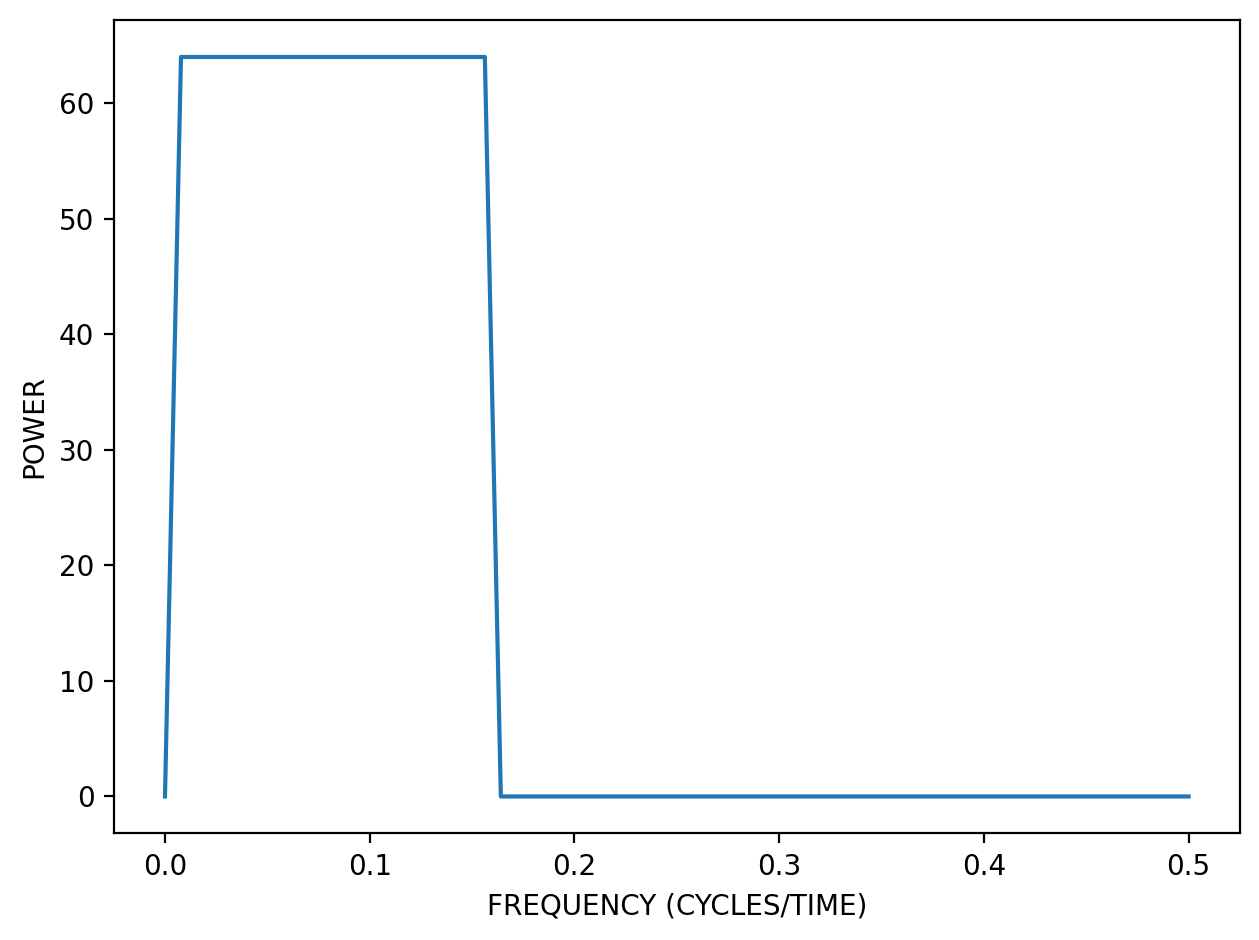

In [7]:
f, Pxx = periodogram(np.sum(st_array,axis=0)) # we'd expect consistent power from 1 to 20 cycles/unit time
plt.figure()
plt.plot(f, Pxx)
plt.xlabel('FREQUENCY (CYCLES/TIME)')
plt.ylabel('POWER')
plt.tight_layout()
plt.show()


Returning to a single one of our signals, we can also simulate the effect of adding Gaussian noise of various magnitudes on the isolation of the true periodic signal and the appearance of spurious peaks in the periodogram:

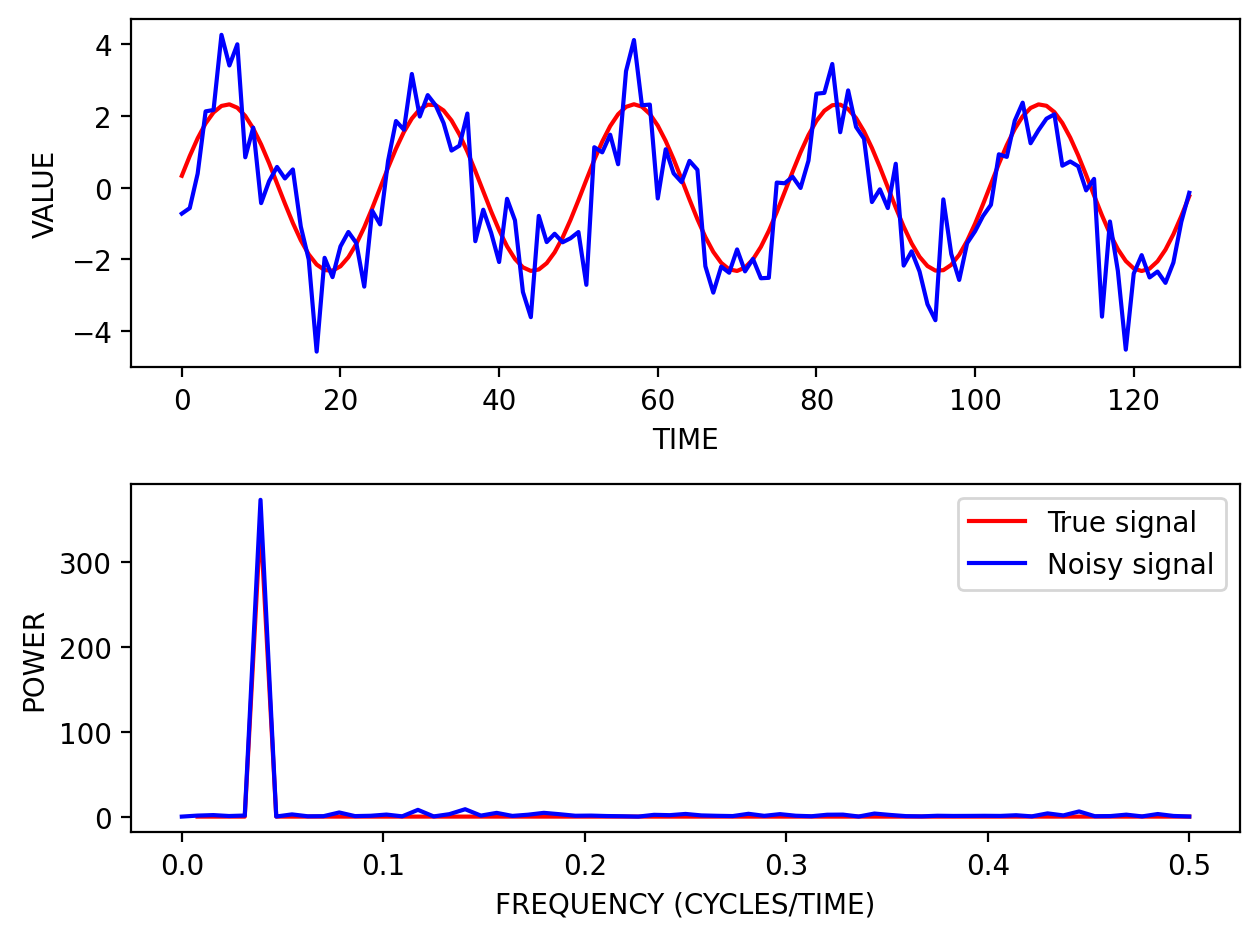

In [8]:
# how much noise to add? 
NoiseLevel = 1

# create noisy signal
combined_plus_noise = combined + np.random.normal(loc=0,scale=NoiseLevel,size=len(combined))

# Simple periodogram on the last combined sine+cosine wave above 
f, Pxx = periodogram(combined) # we'll expect a signal a bit longer than 20 time untis (6 cycles per 128 time units ~20ish year wavelength)
fN, PxxN = periodogram(combined_plus_noise) # we'll expect a signal a bit longer than 20 time untis (6 cycles per 128 time units ~20ish year wavelength)

f = np.delete(f, 0) # remove the zero-th power
Pxx = np.delete(Pxx, 0) # remove the zero-th power

plt.figure()

plt.subplot(2, 1, 1)
plt.plot(combined,color="red",label="True signal")
plt.plot(combined_plus_noise,color="blue",label="Noisy signal")
plt.ylabel('VALUE')
plt.xlabel('TIME')

plt.subplot(2, 1, 2)
plt.plot(f, Pxx,color="red",label="True signal")
plt.plot(fN, PxxN,color="blue",label="Noisy signal")
plt.xlabel('FREQUENCY (CYCLES/TIME)')
plt.ylabel('POWER')
plt.legend()

plt.tight_layout()
plt.show()

The plot below shows the lag-1 correlation between a sine wave and itself and a cosine wave and itself:

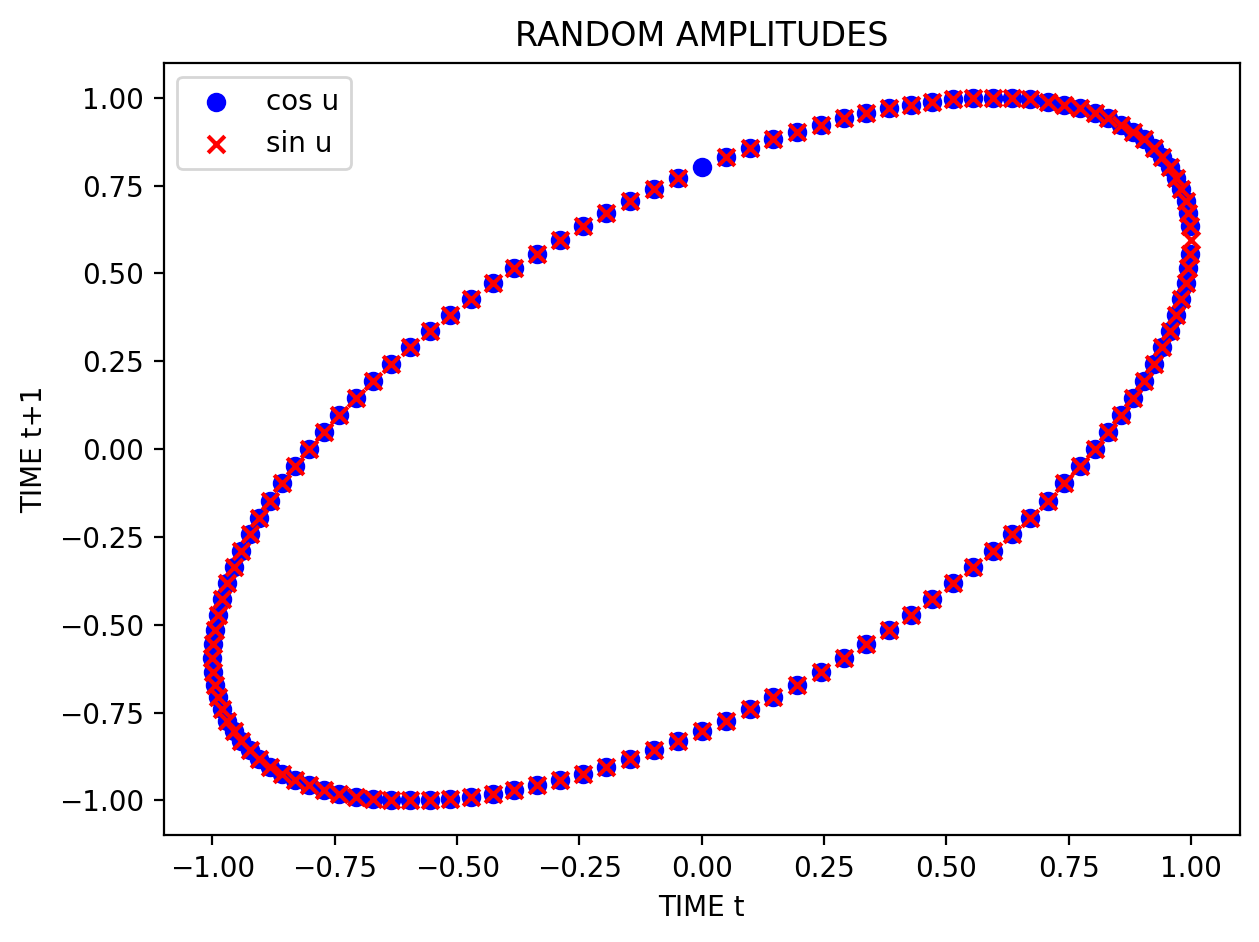

In [9]:
# Lagged correlation and structure of sines and cosines
plt.figure()
plt.scatter(ct_array[18][:-1], ct_array[18][1:], color='b', label='cos u')
plt.scatter(st_array[18][:-1], st_array[18][1:], color='r', marker='x',label='sin u')
plt.xlabel('TIME t')
plt.ylabel('TIME t+1')
plt.legend()
plt.title('RANDOM AMPLITUDES')
plt.tight_layout()
plt.show()


We can explore the relationship between periodic signals and autocorrelation at different temporal lags by looking at the lagged Pearson correlation (from Scipy) for one of these time series: 

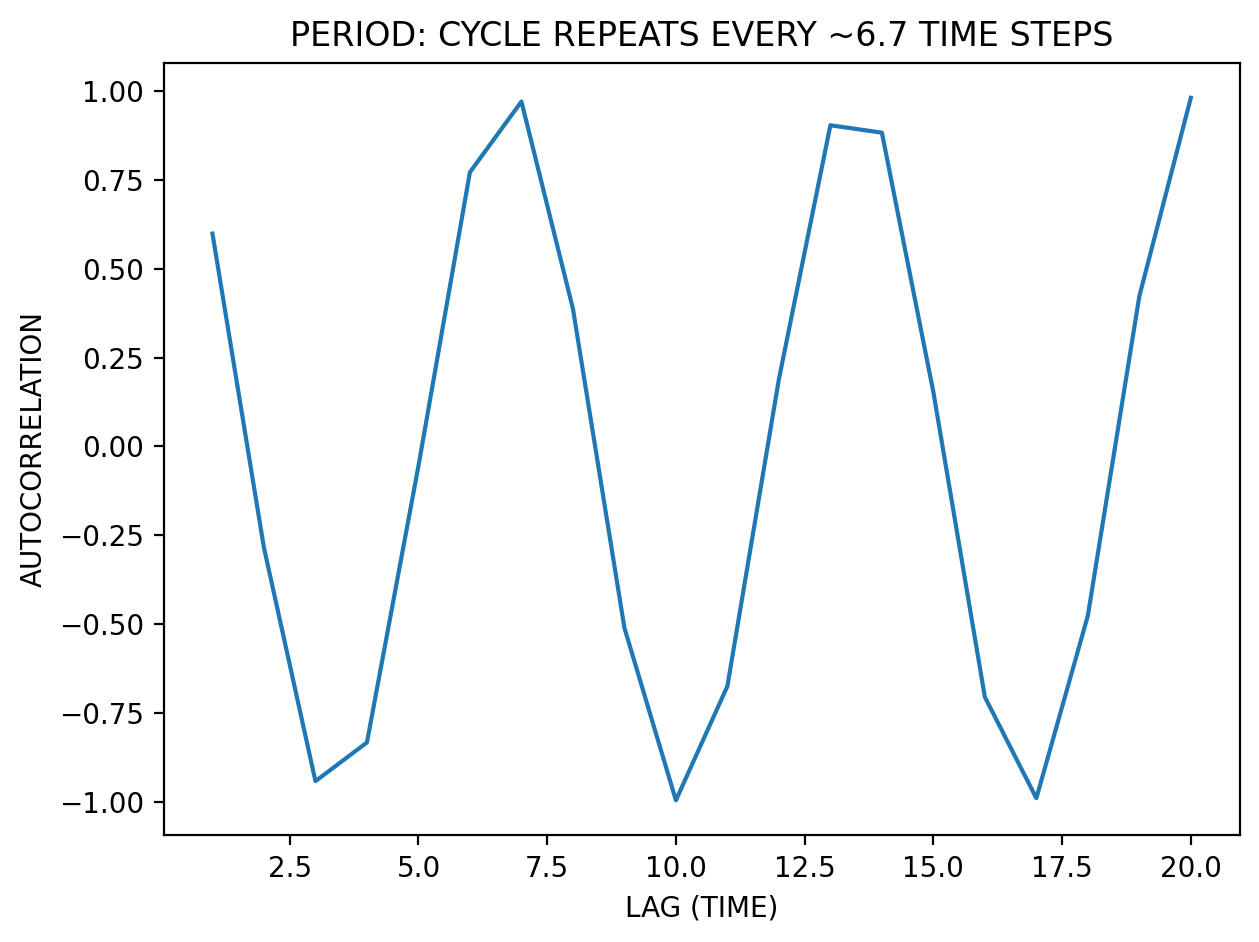

In [10]:
from scipy.stats import pearsonr

# Linking frequency and autocorrelation
scf = []
for j in range(1, 21):
    R, _ = pearsonr(st_array[18][:-j], st_array[18][j:]) # lagged correlation
    scf.append(R)

plt.figure()
plt.plot(range(1, 21), scf)
plt.xlabel('LAG (TIME)')
plt.ylabel('AUTOCORRELATION')
plt.title('PERIOD: CYCLE REPEATS EVERY ~6.7 TIME STEPS')
plt.tight_layout()
plt.show()


Note that Pandas has a `autocorrelation_plot` (https://pandas.pydata.org/docs/reference/api/pandas.plotting.autocorrelation_plot.html), _but_ it does a different type of calculation than the lagged `corrcoef` we performed above - see here for more about this: https://stackoverflow.com/questions/36038927/whats-the-difference-between-pandas-acf-and-statsmodel-acf

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

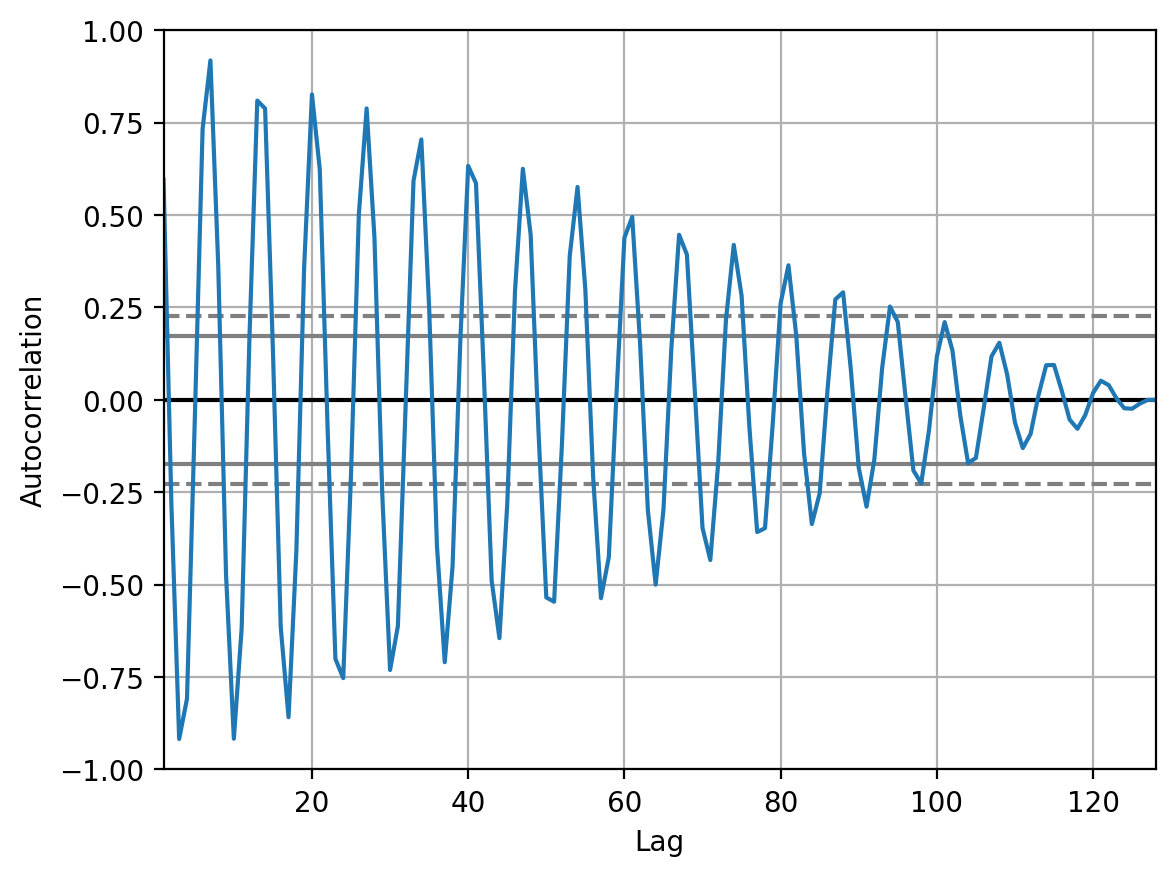

In [11]:
import pandas as pd
from pandas.plotting import autocorrelation_plot

s = pd.Series(st_array[18])
autocorrelation_plot(s)  


The code below uses our set of sine waves from above and calculates the lagged correlation out to 20 lags.  This is meant to demonstrate the relationship between periodic behavior and auto-correlation at lags, a feature we'll implicitly use when we do singular spectrum analysis in the next lecture.

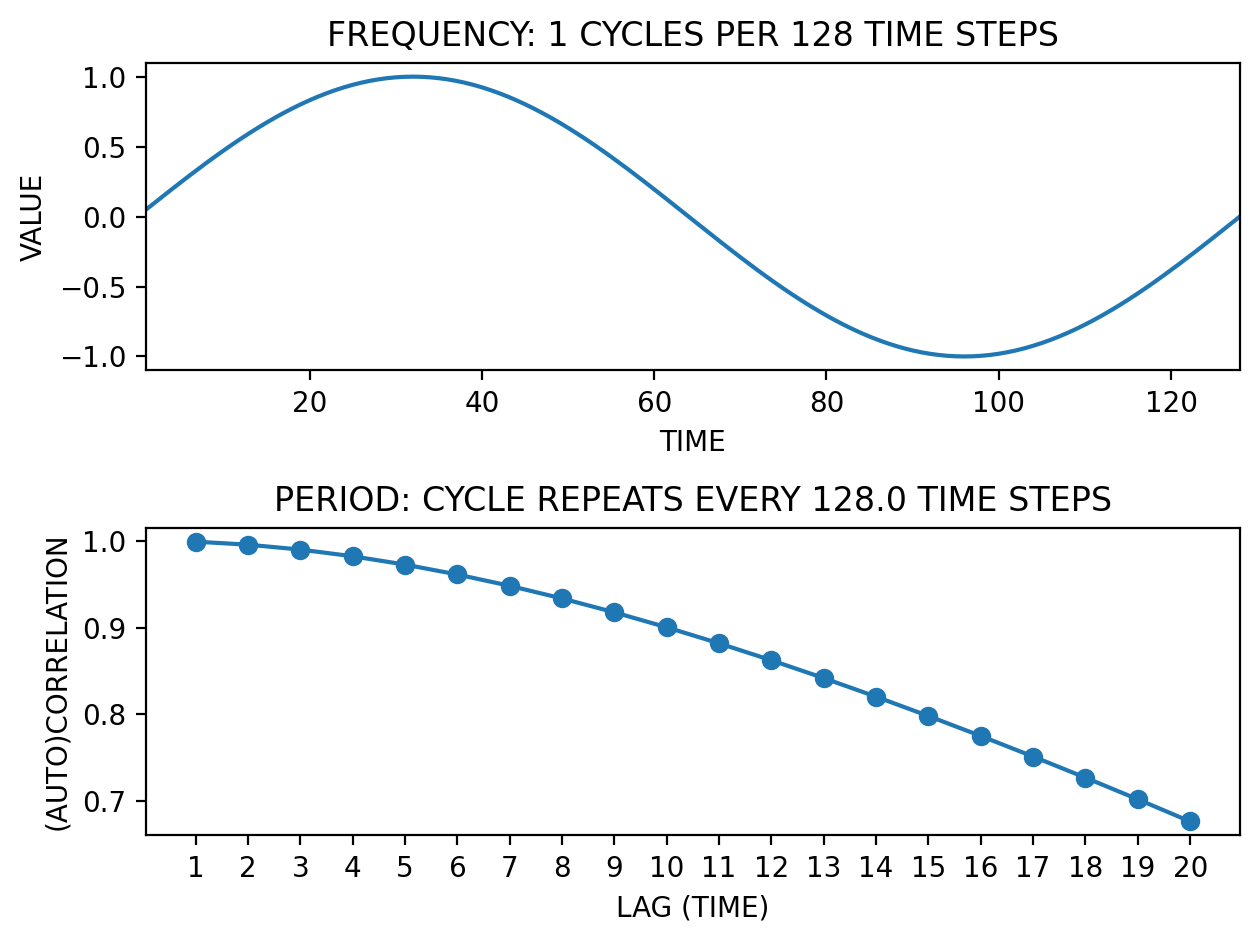

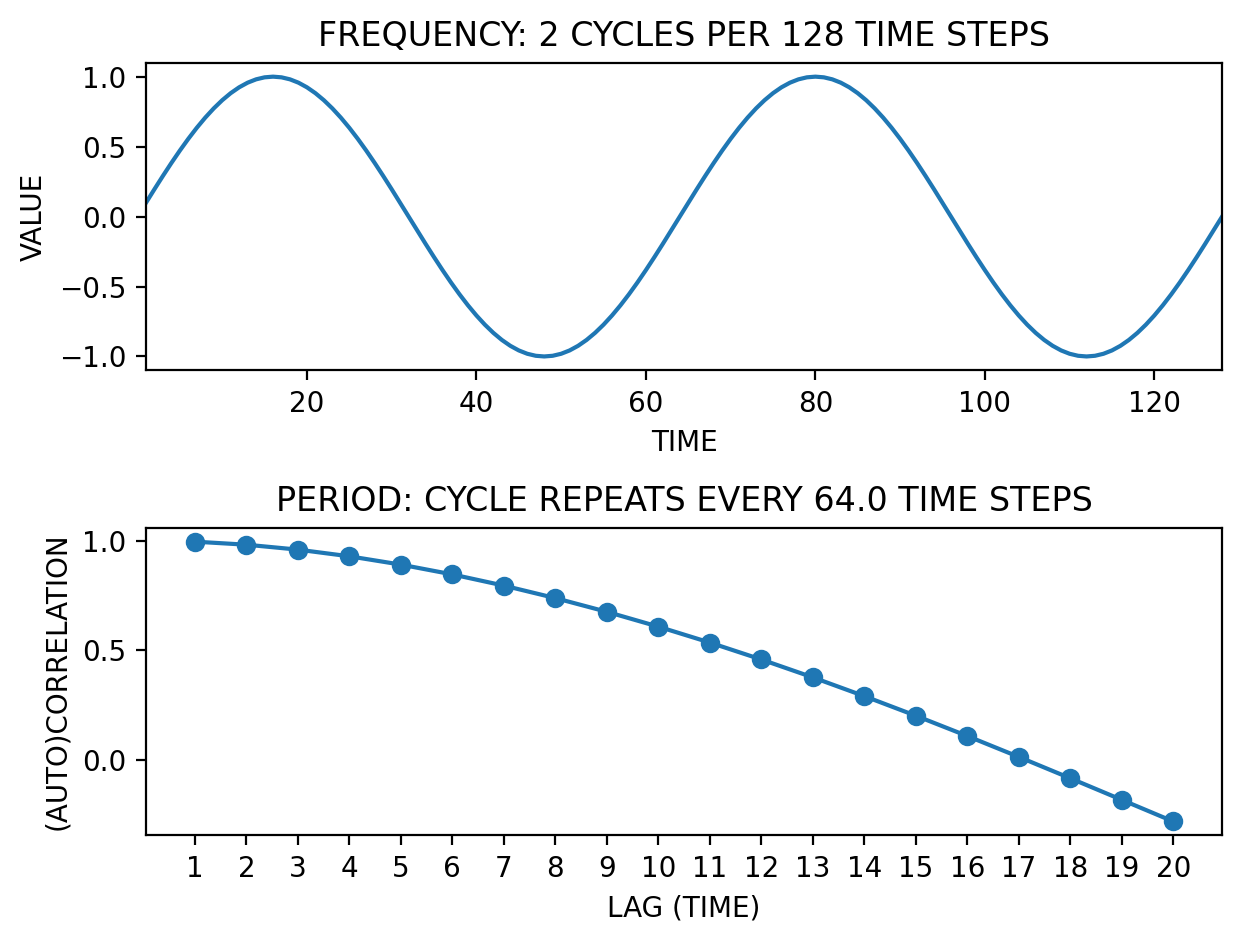

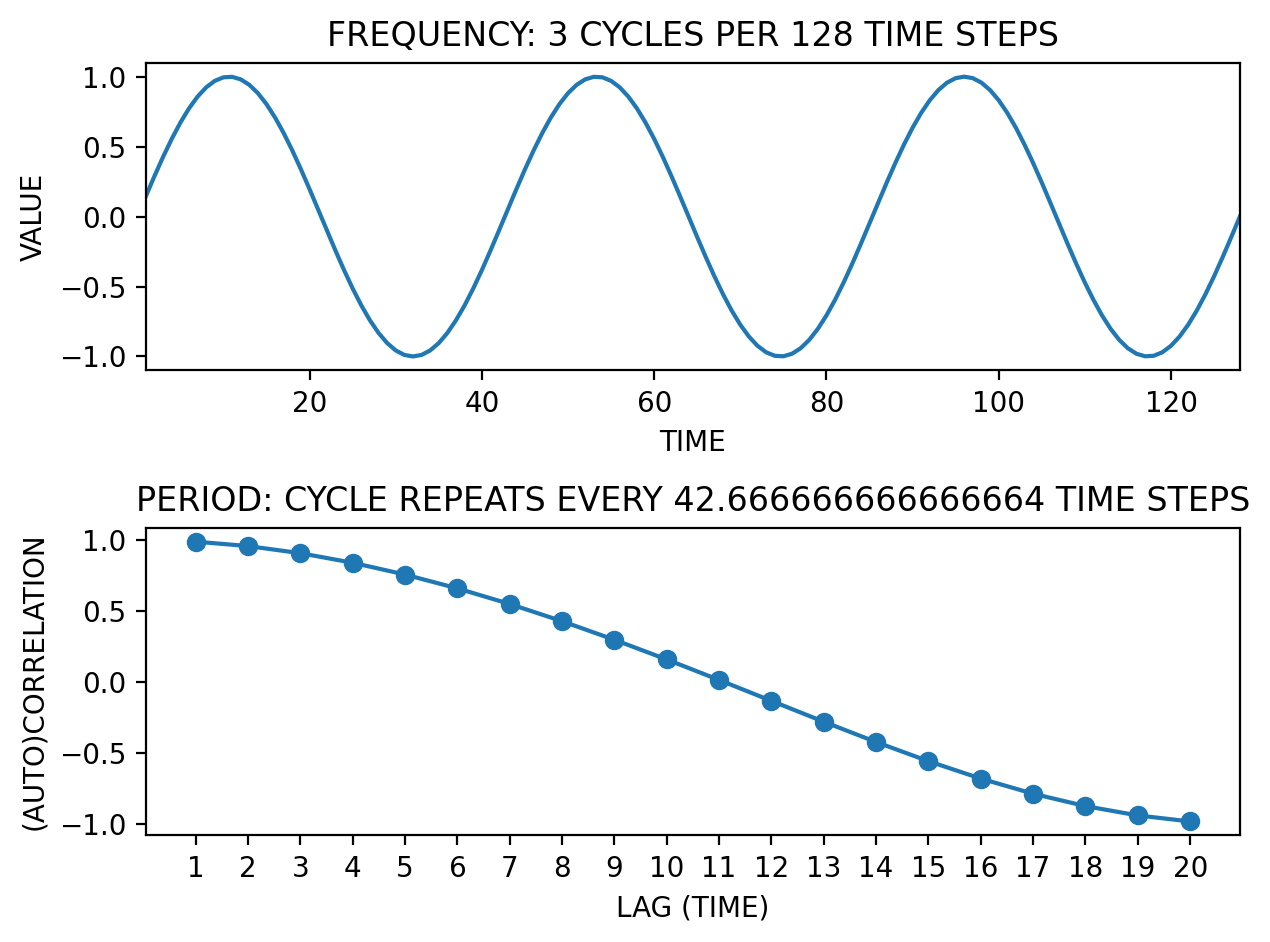

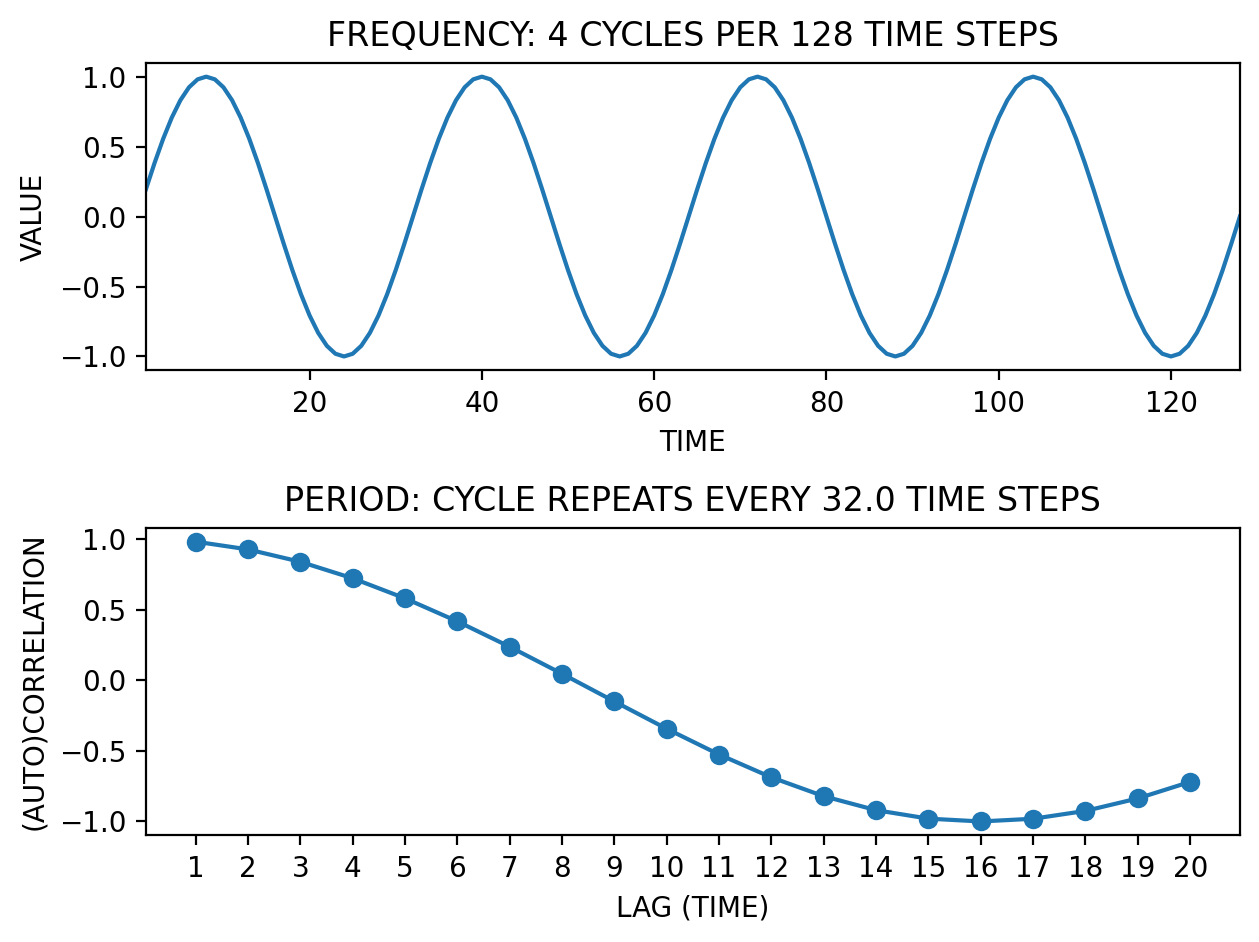

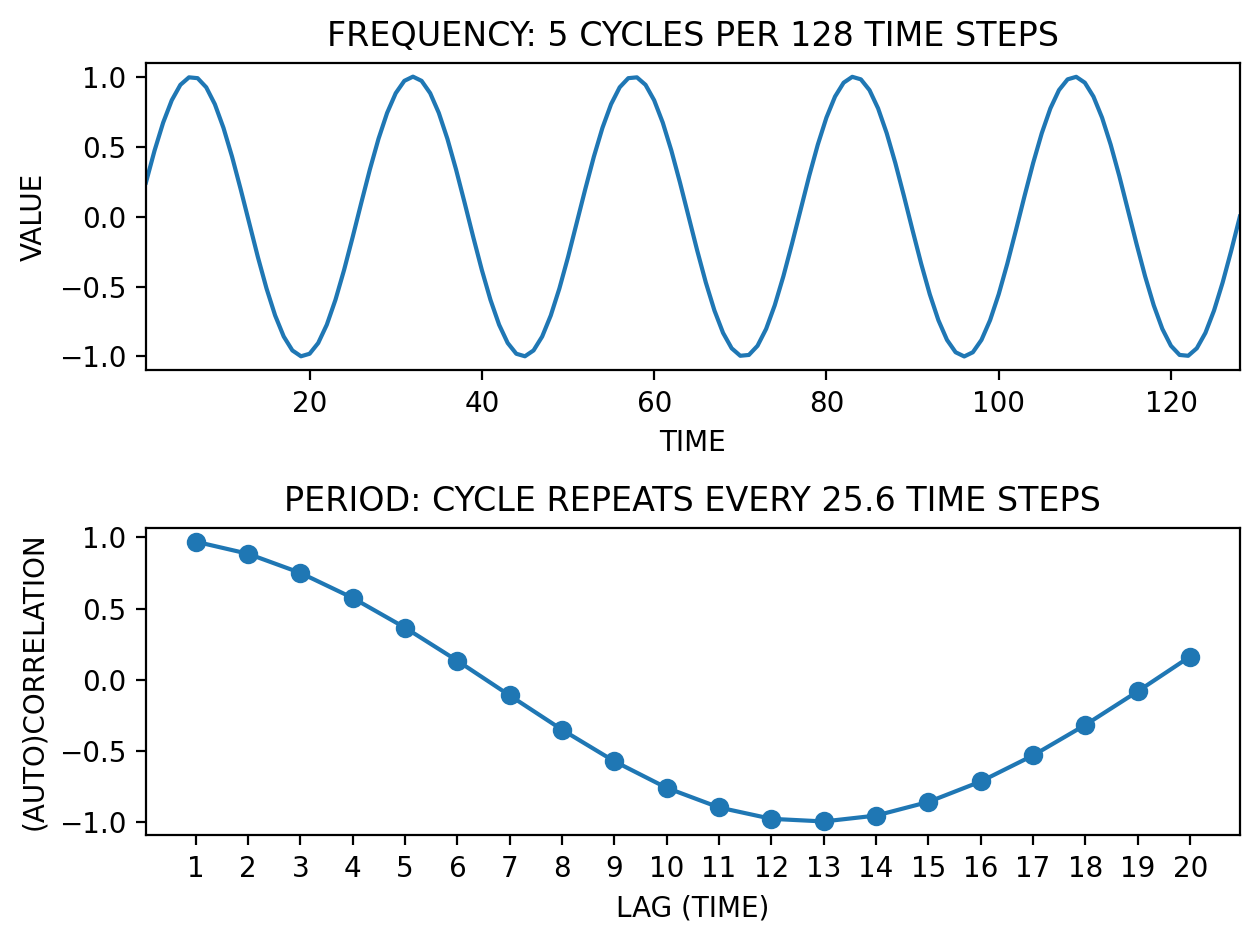

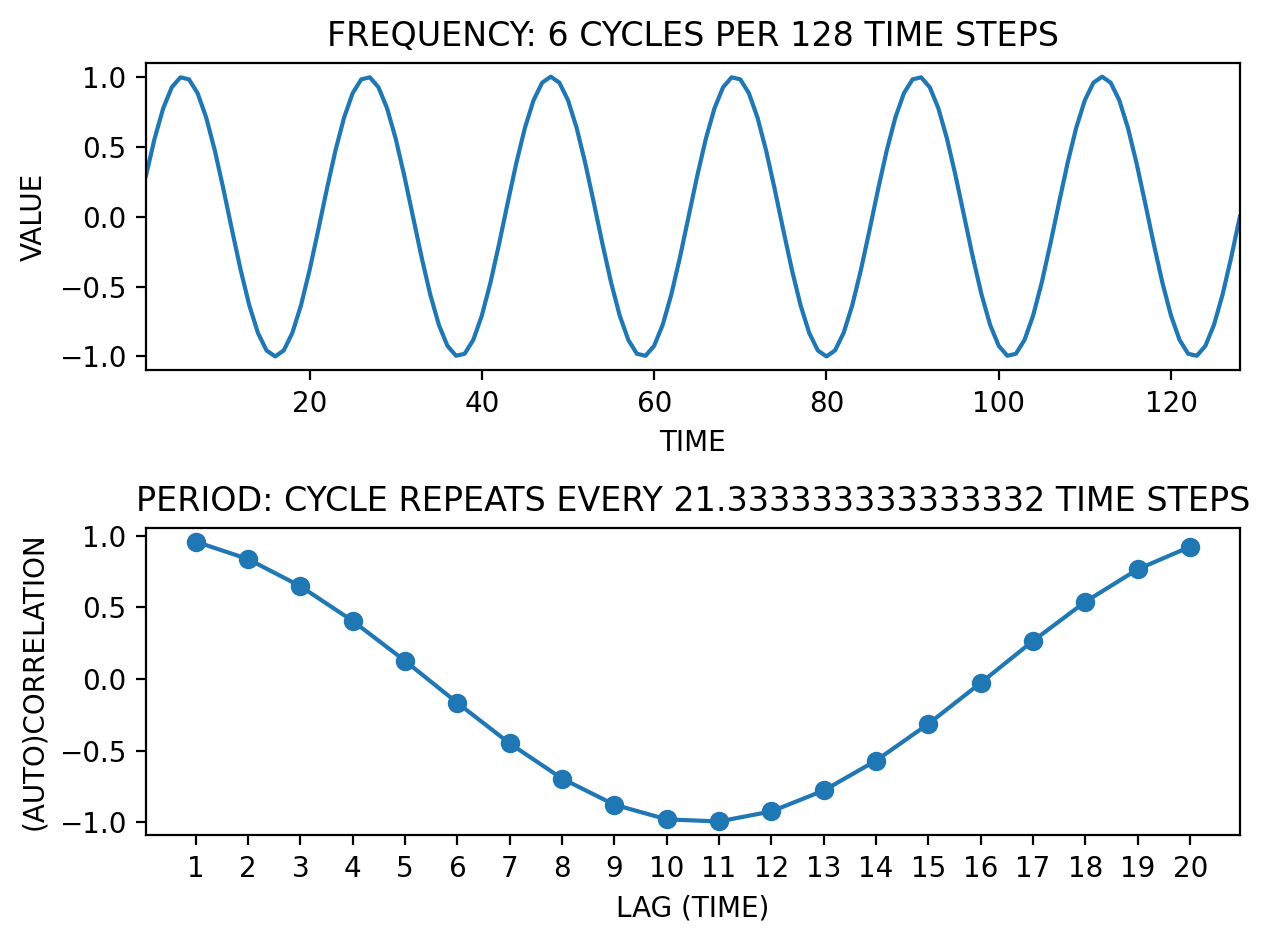

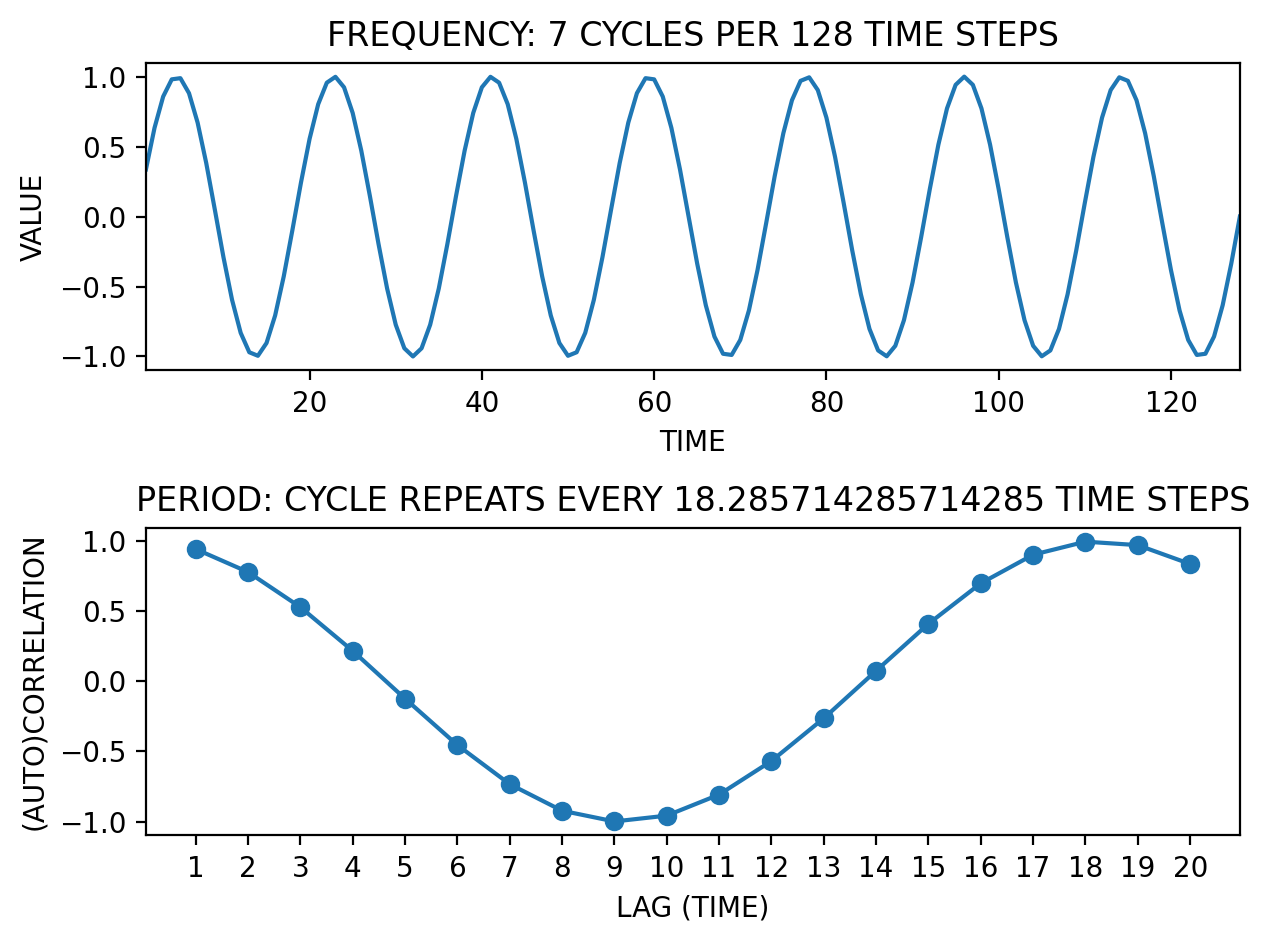

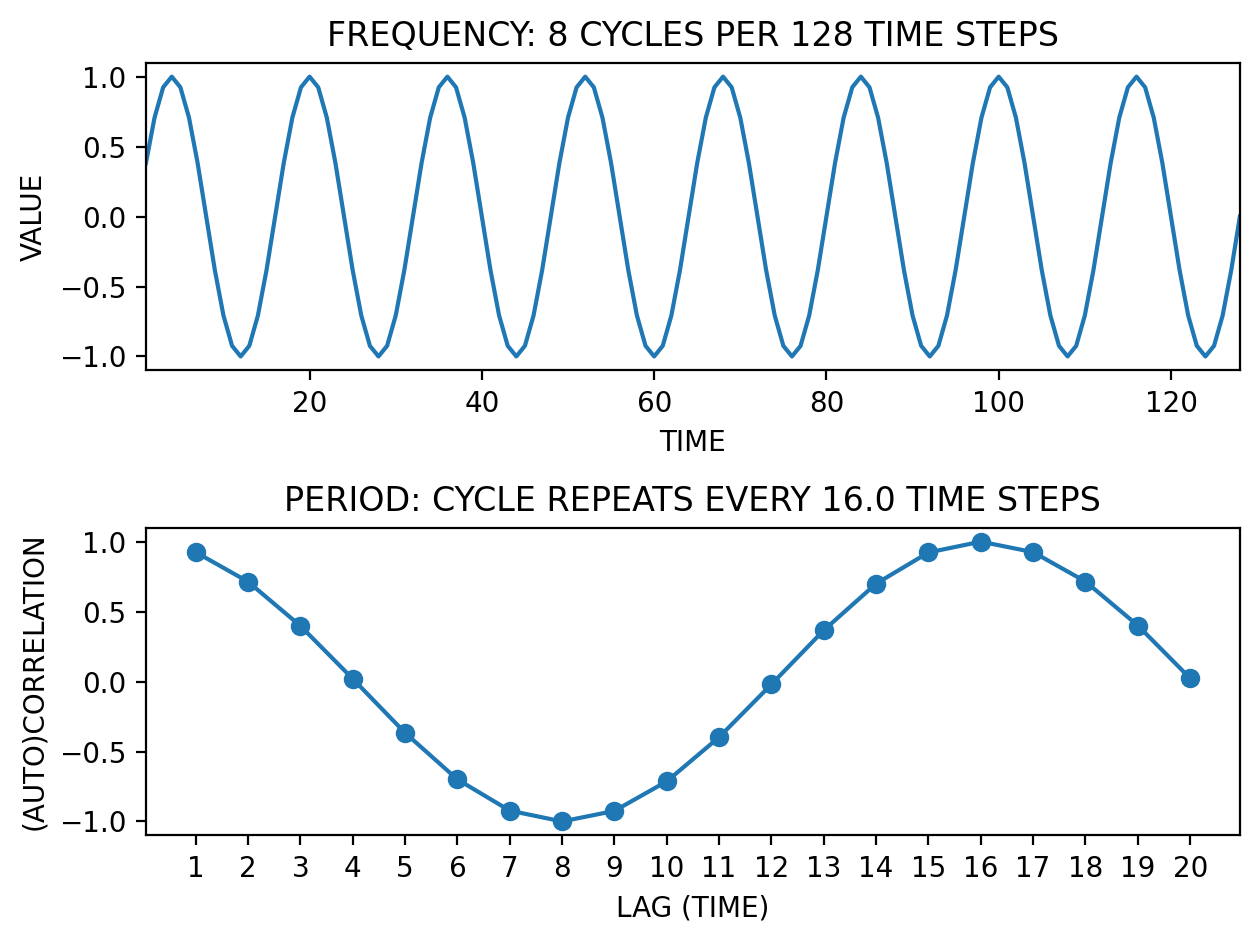

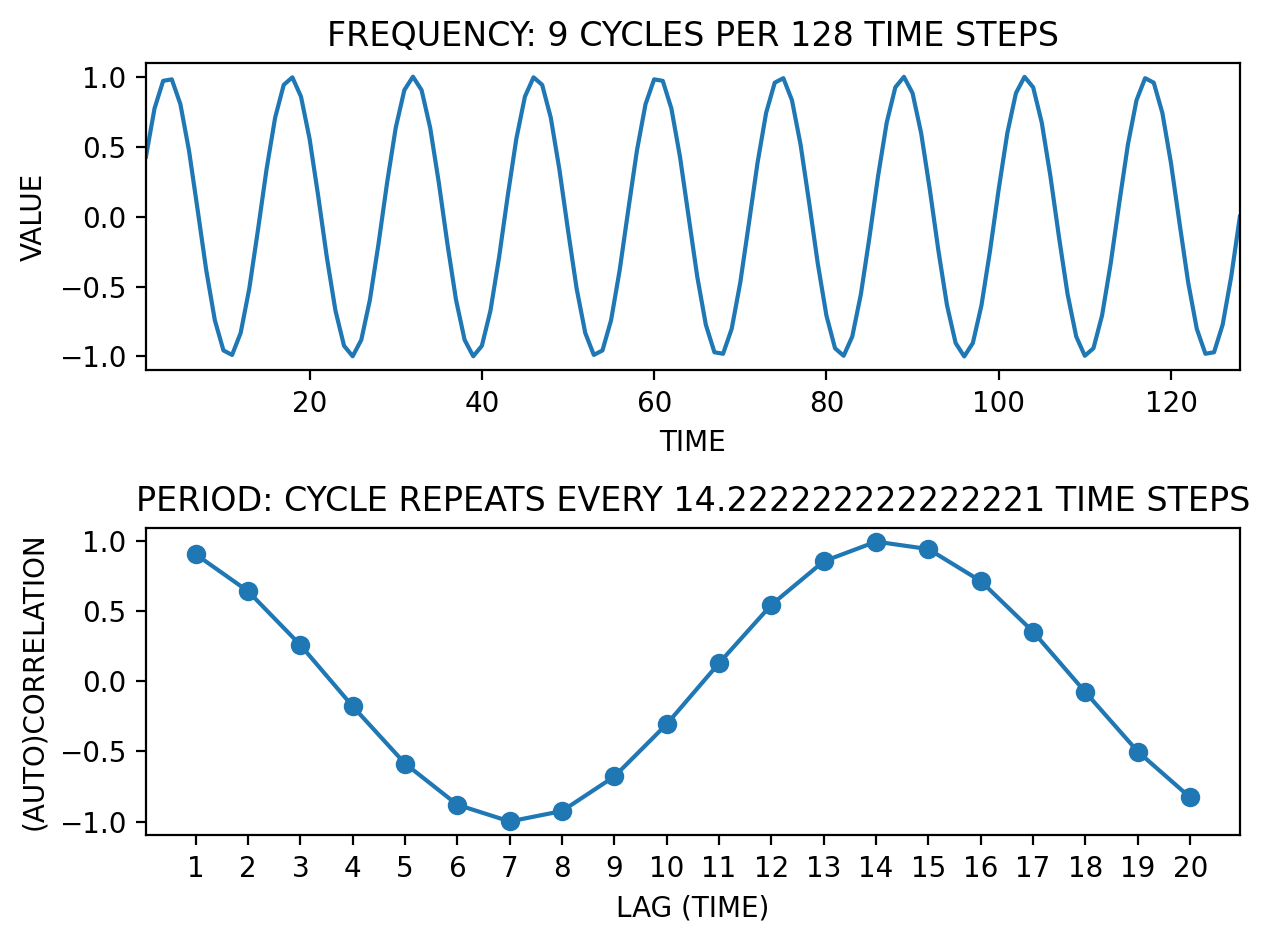

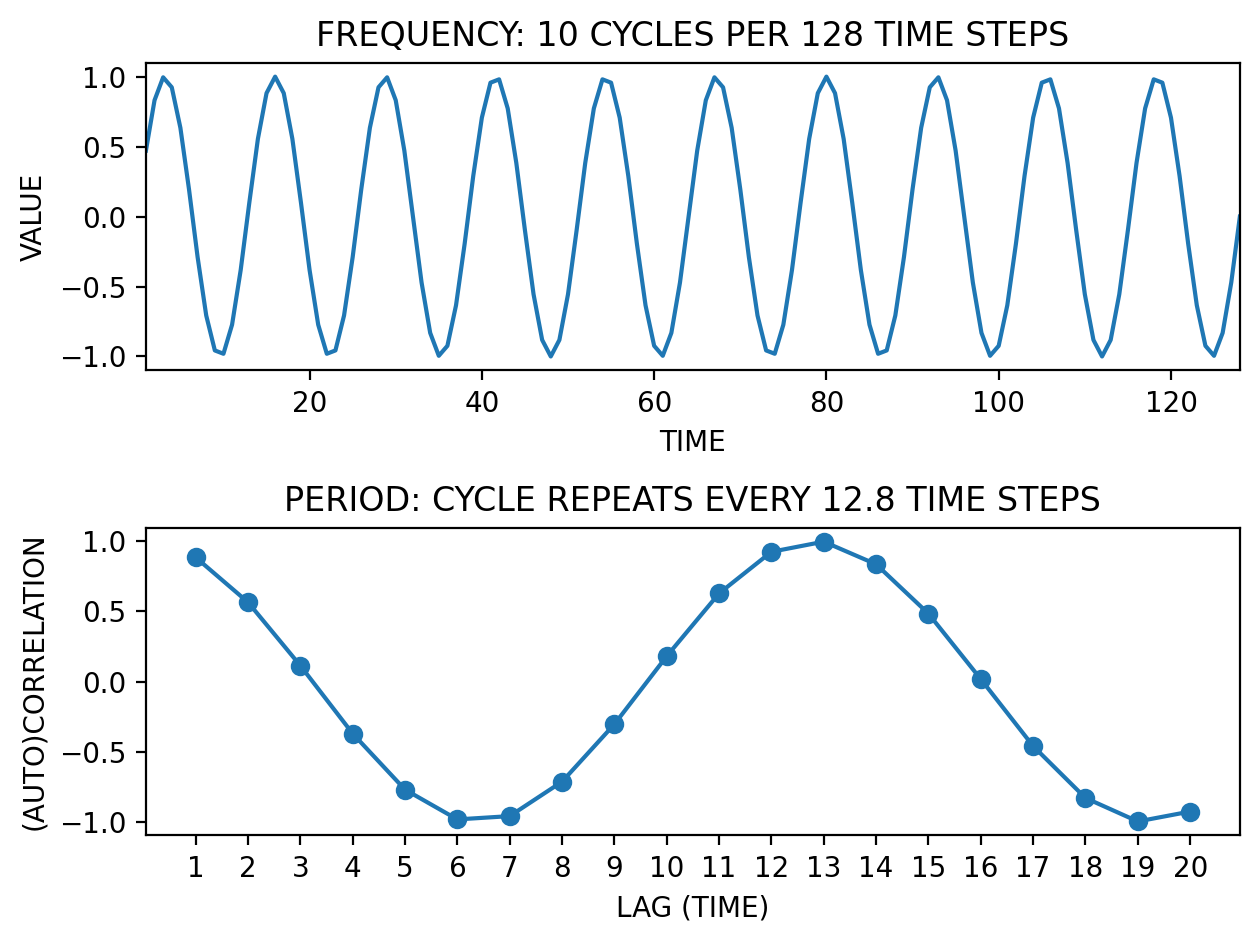

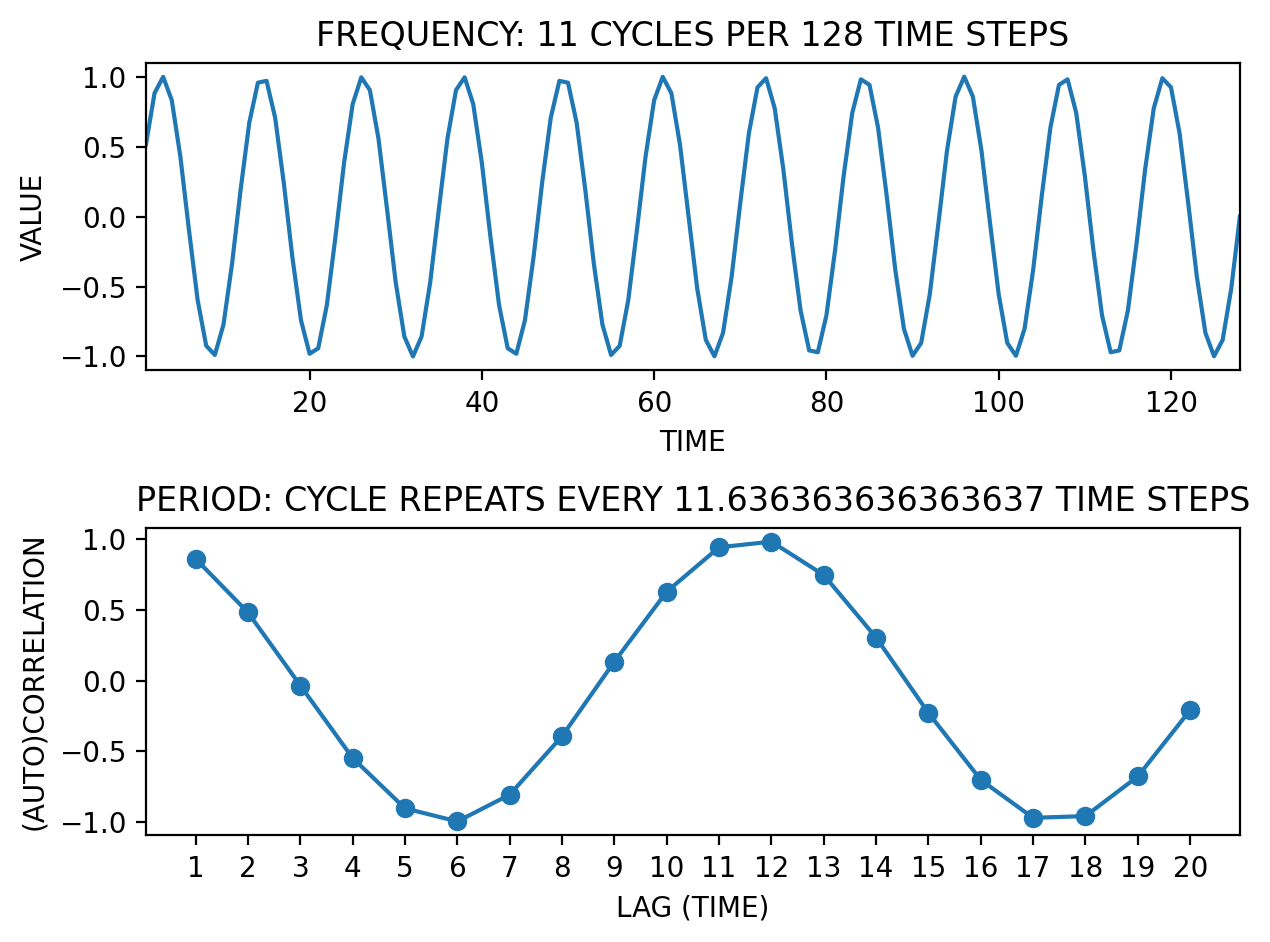

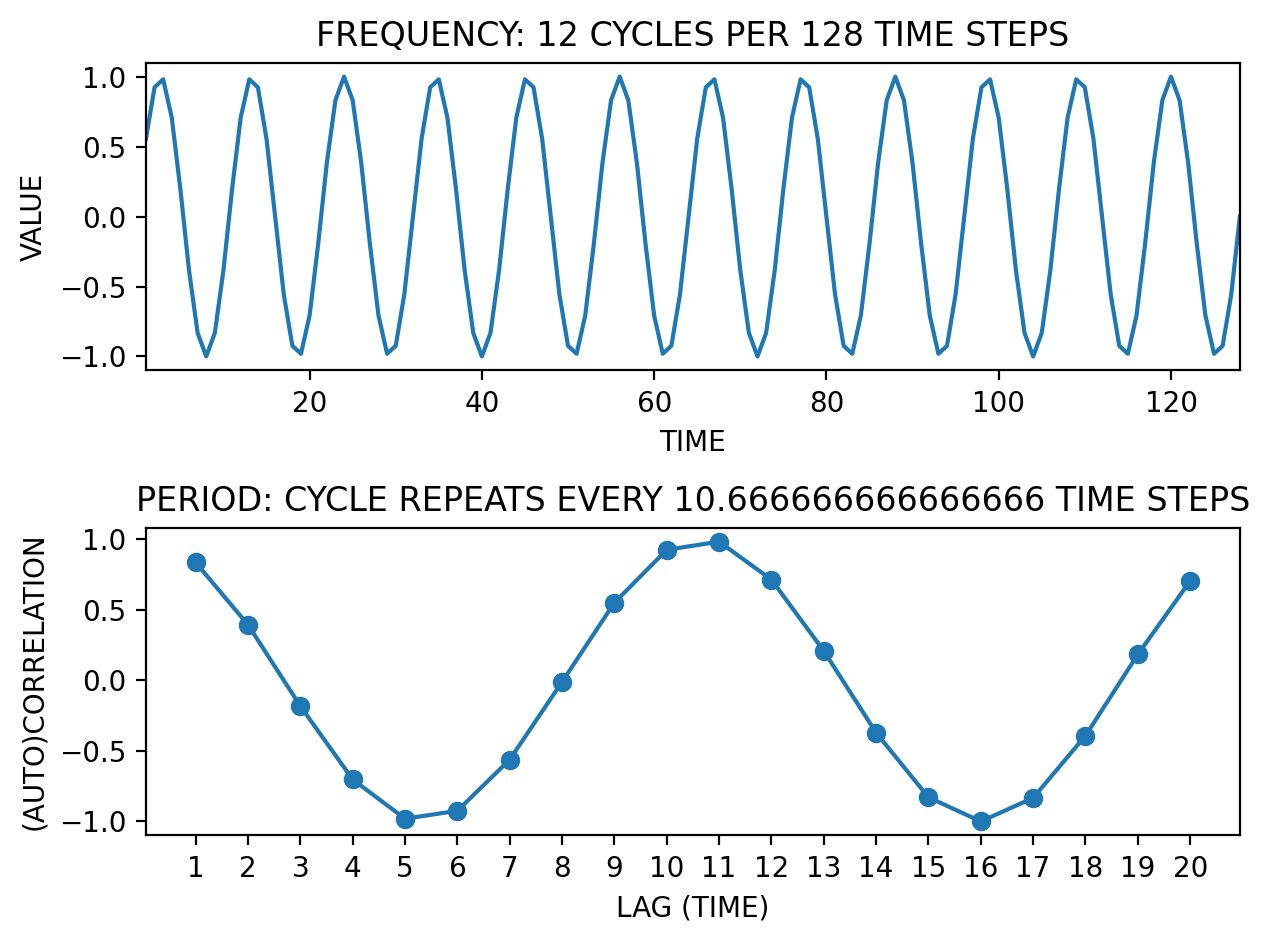

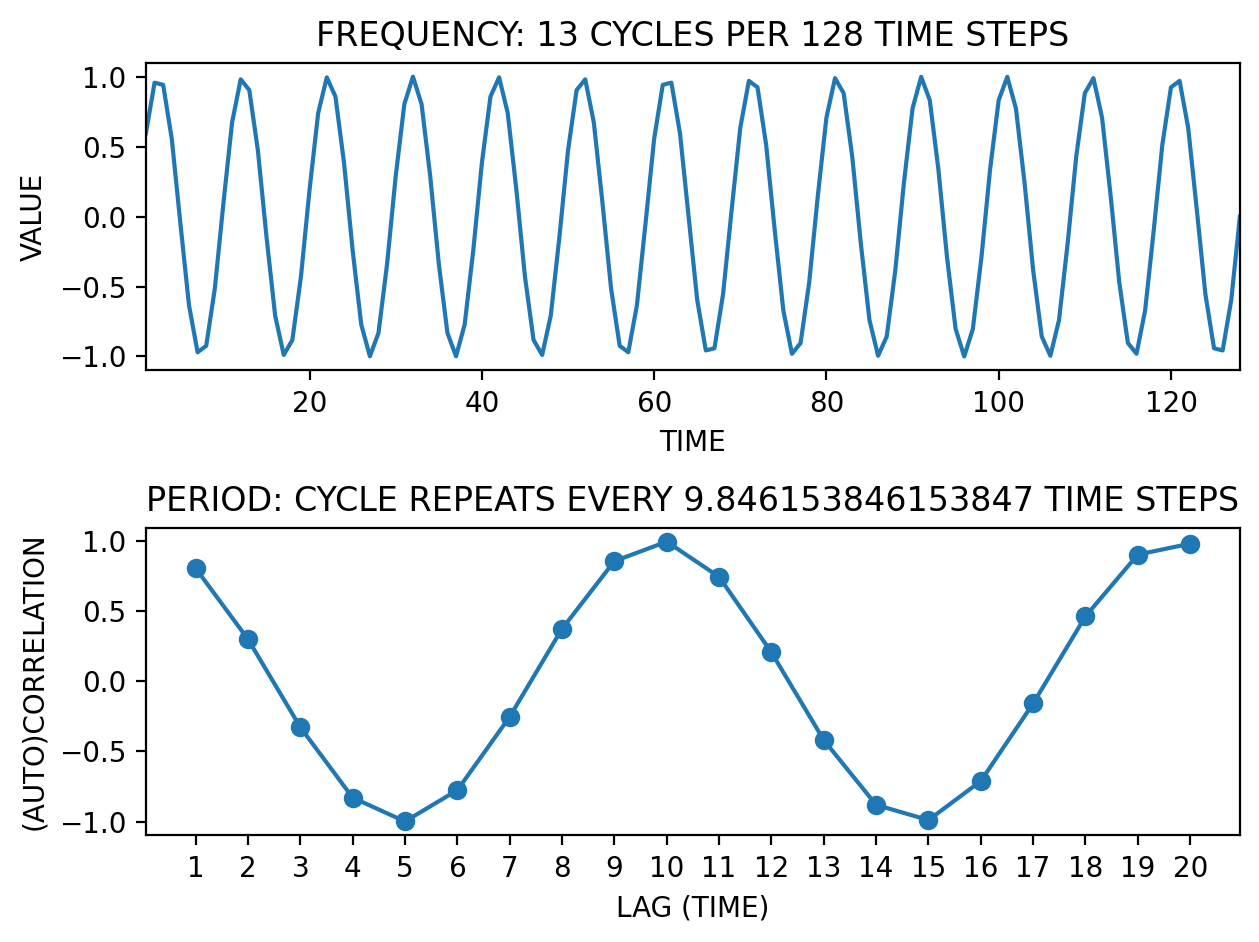

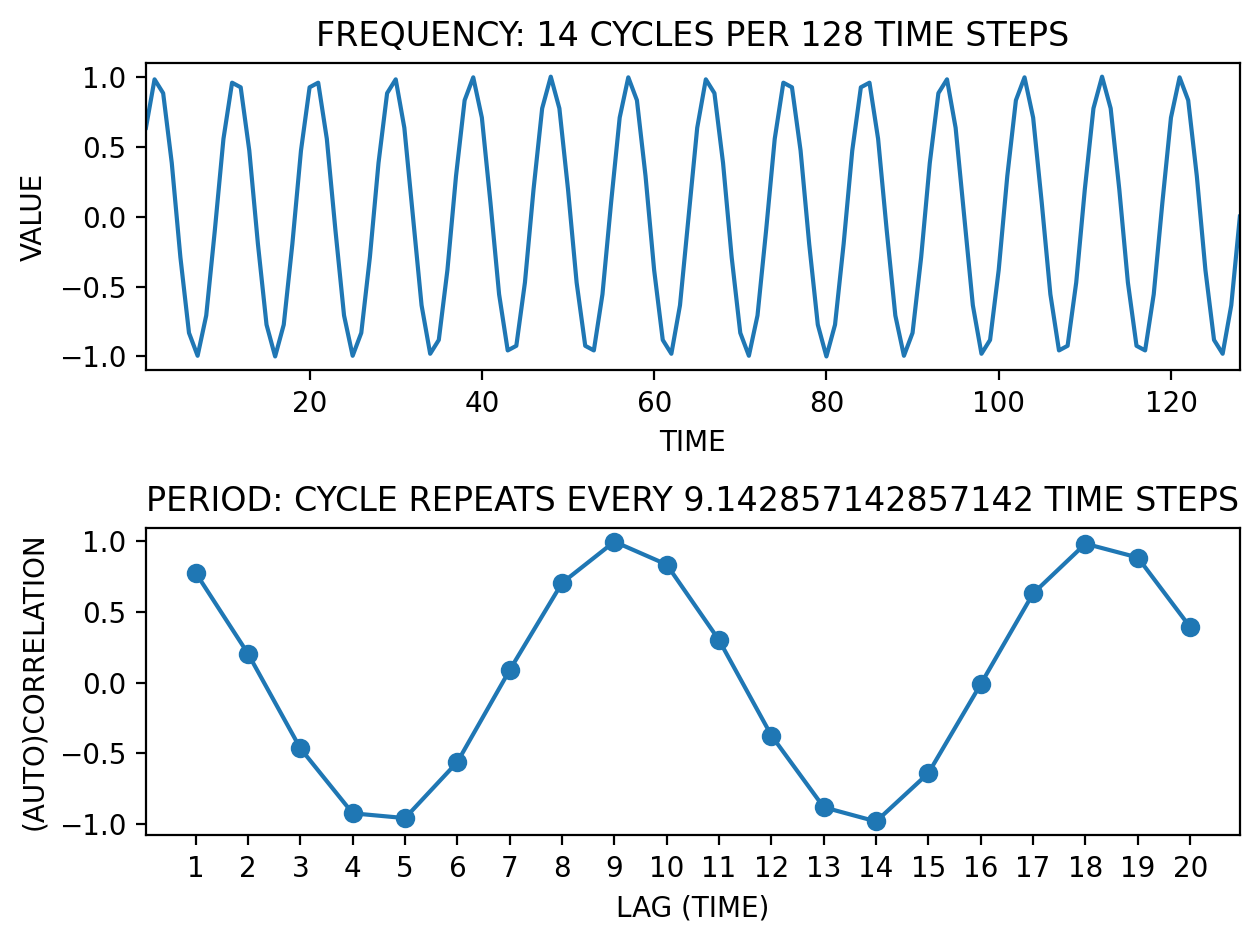

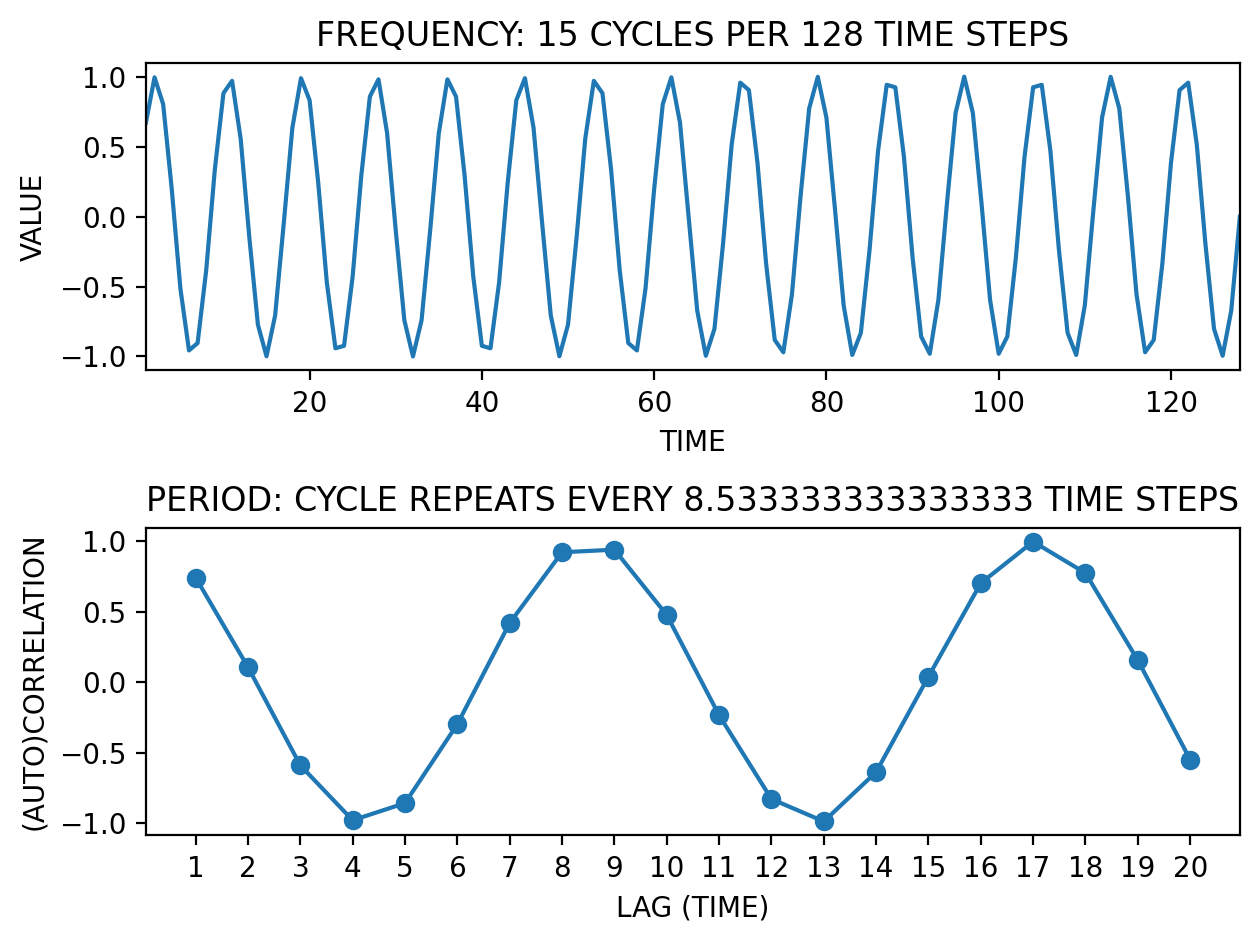

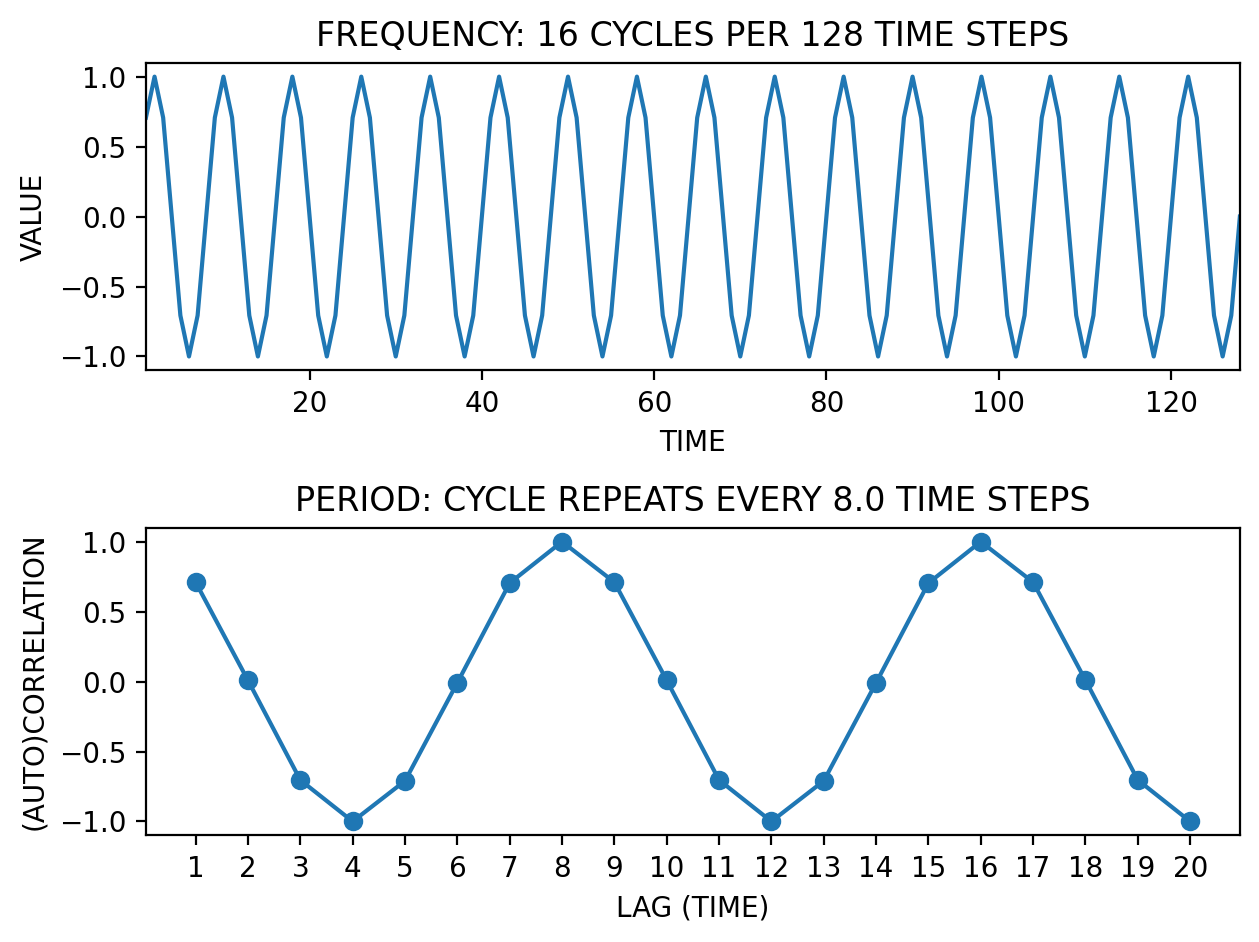

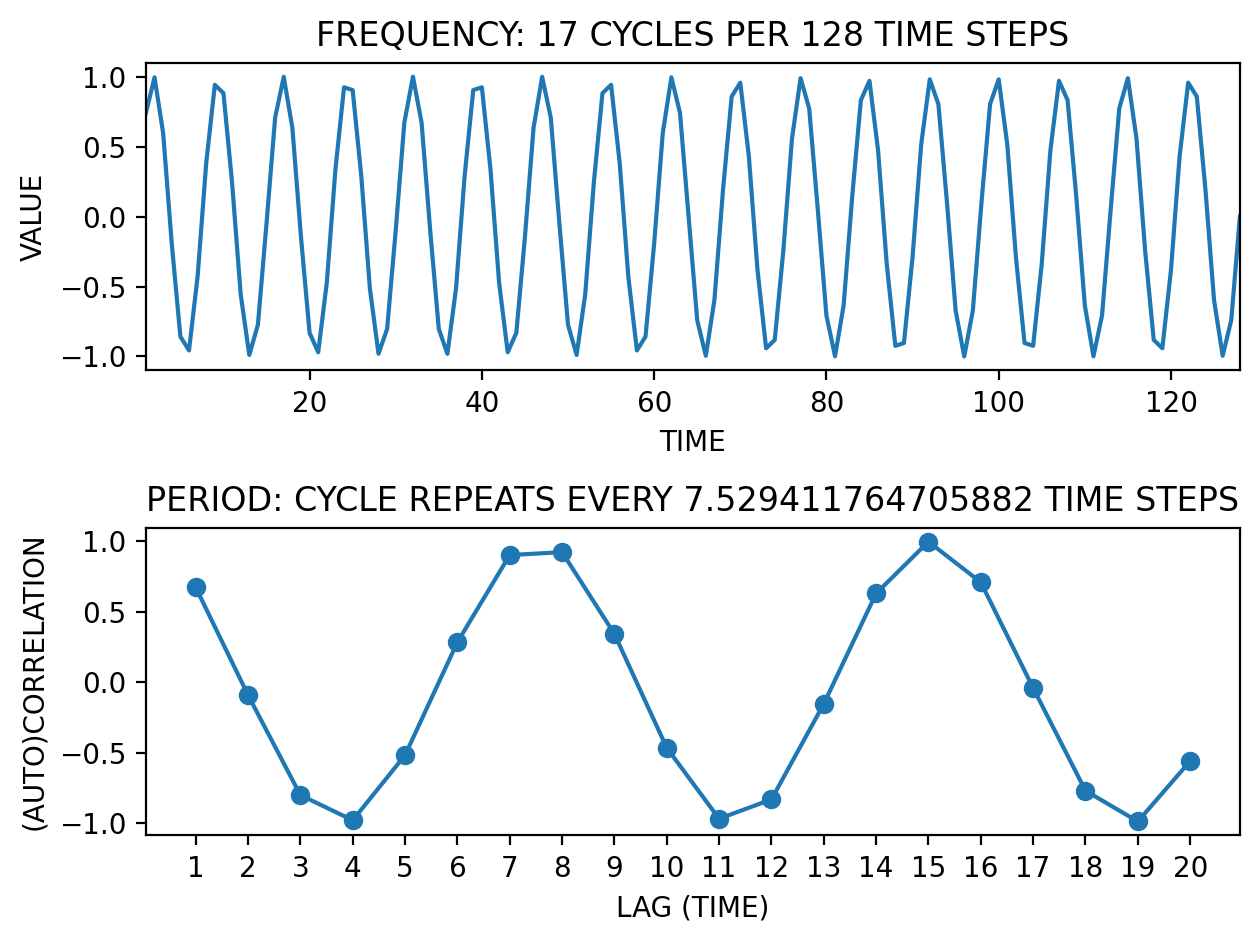

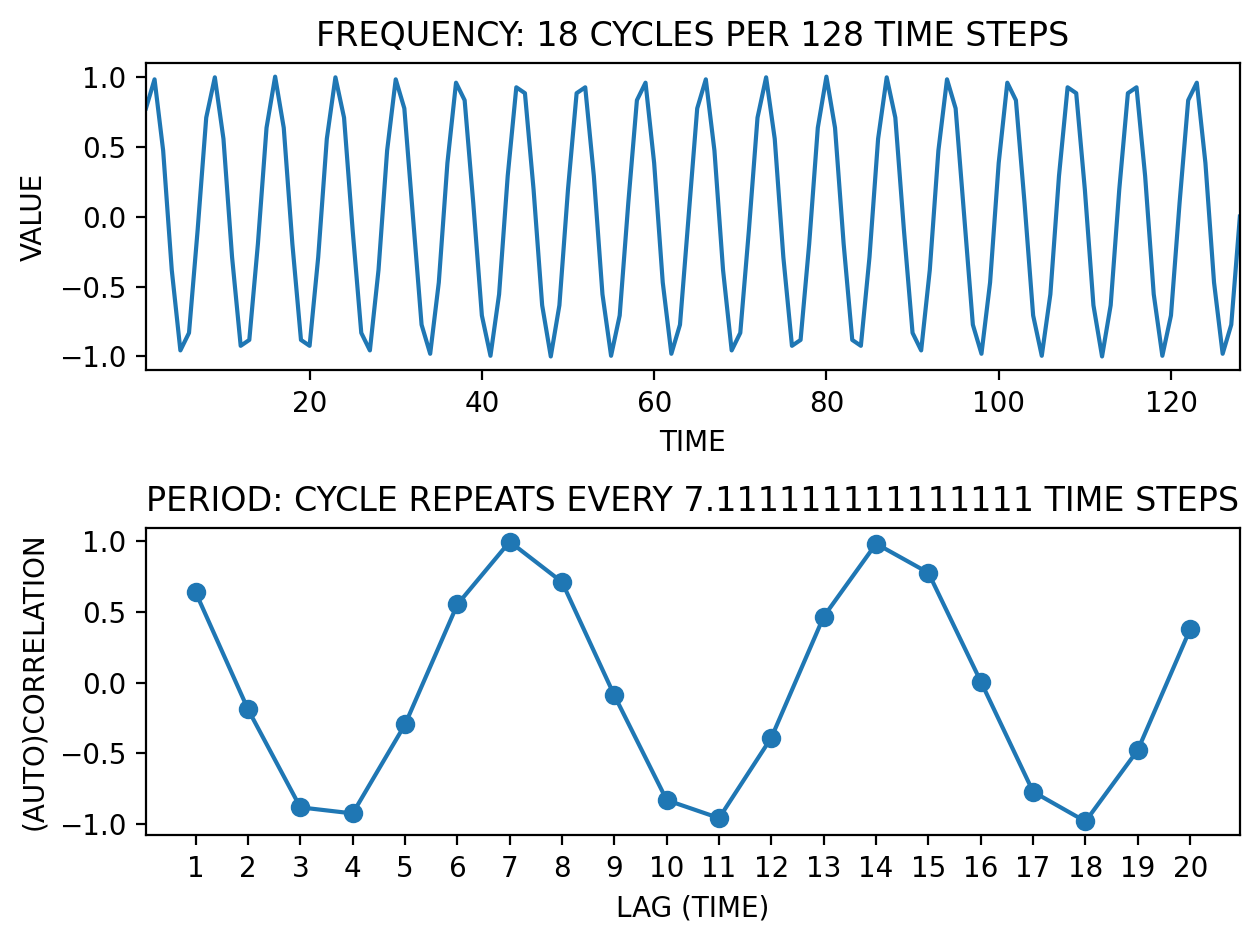

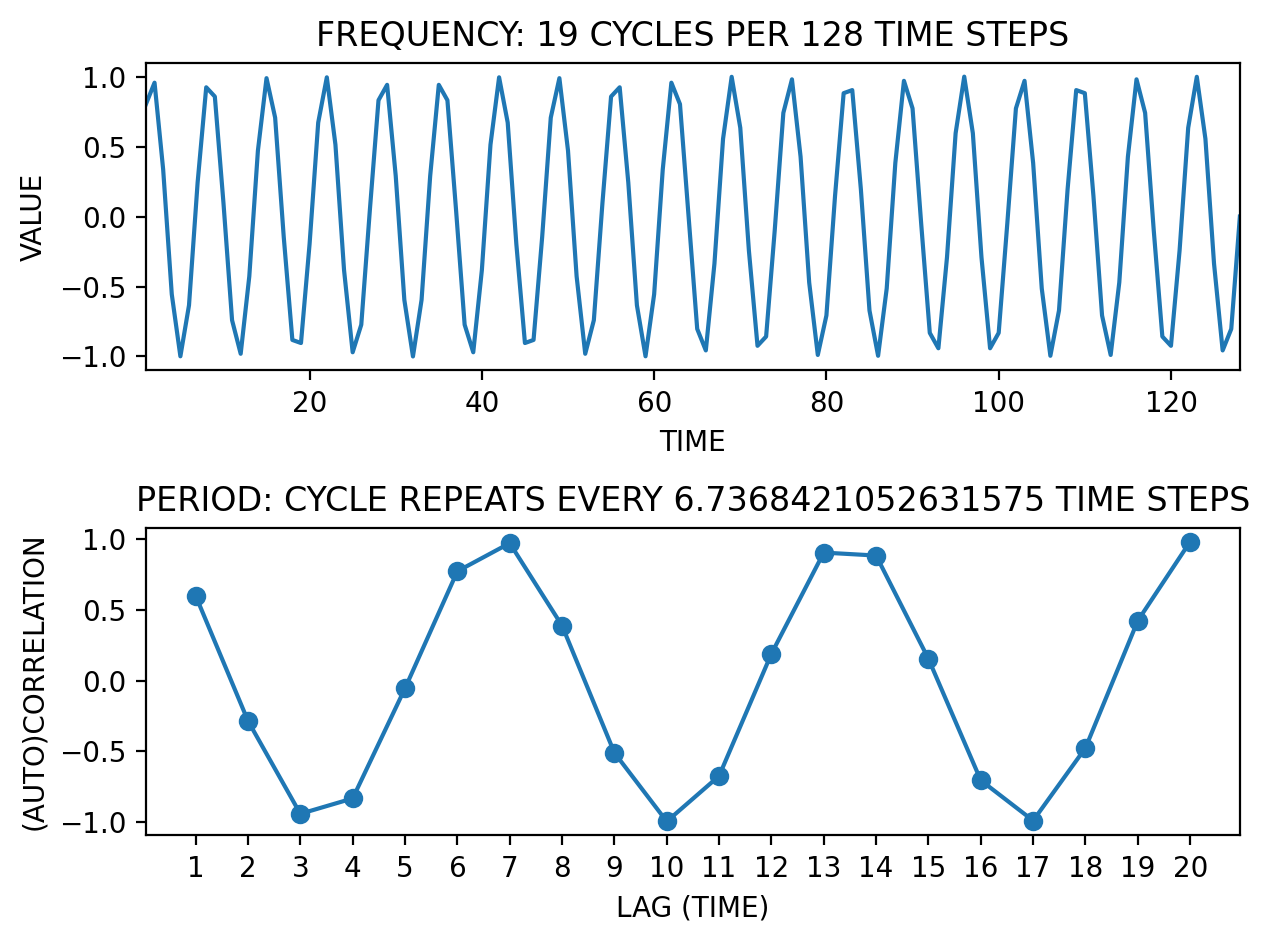

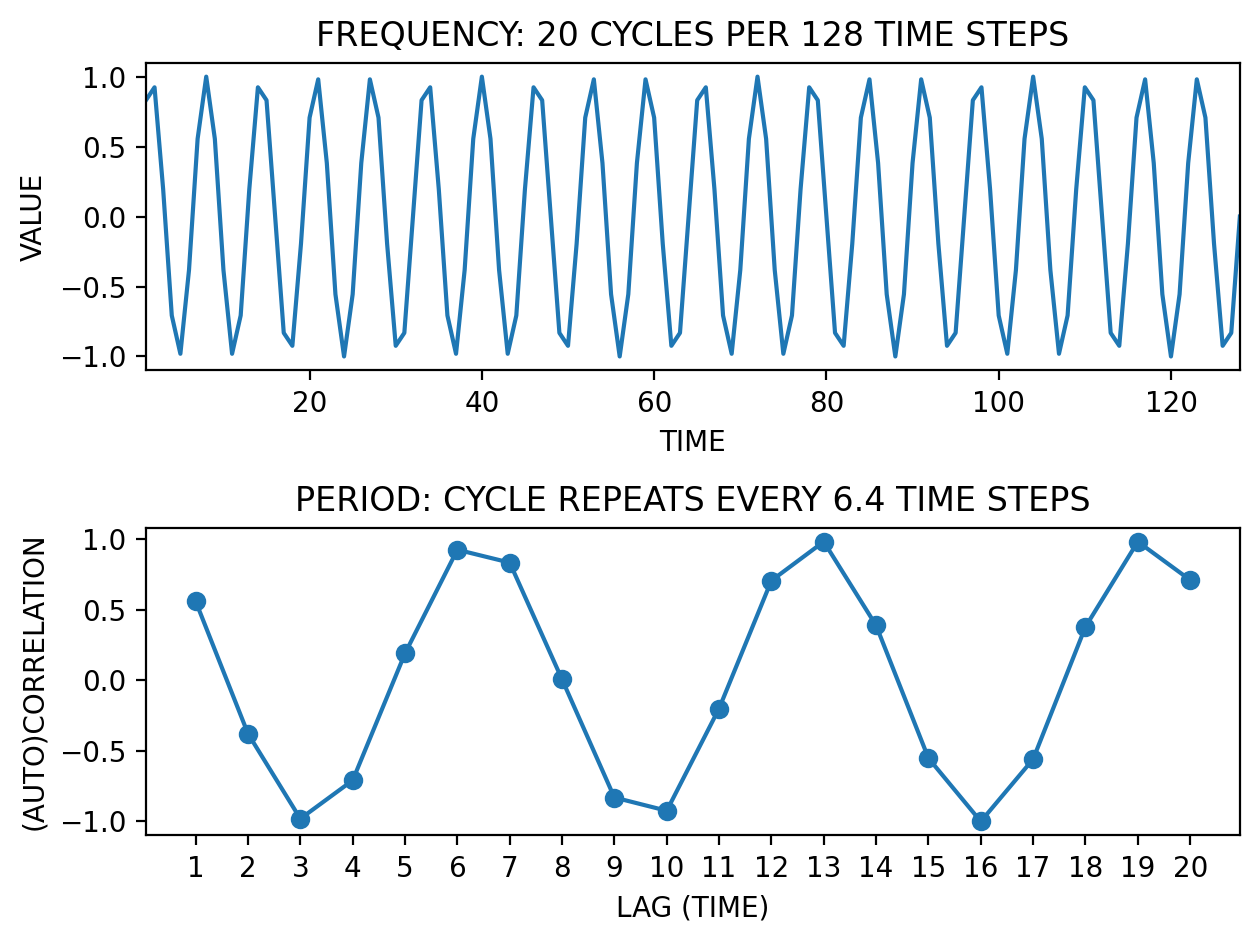

In [12]:

for i in range(1, 21):
    scf = []
    for j in range(1, 21):
        R, _ = pearsonr(st_array[i-1][:-j], st_array[i-1][j:])
        scf.append(R)
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(t, st_array[i-1])
    plt.xlim([1, 128])
    plt.xlabel('TIME')
    plt.ylabel('VALUE')
    plt.title(f'FREQUENCY: {i} CYCLES PER 128 TIME STEPS')

    plt.subplot(2, 1, 2)
    plt.plot(range(1, 21), scf, marker="o")
    plt.xlabel('LAG (TIME)')
    plt.ylabel('(AUTO)CORRELATION')
    plt.title(f'PERIOD: CYCLE REPEATS EVERY {1/(i/128)} TIME STEPS')
    plt.xticks(np.arange(1,21))

    plt.tight_layout()
    plt.show()
